In [28]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
import seaborn as sns
import geopandas as gpd
from scipy.stats import pearsonr

In [3]:
file_path = '/Users/santiagowon/Dropbox/Santiago/01. Maestria/Critical Data Representation and Analysis/Final Project/bbdd/Main.xlsx'
pd.set_option('display.max_columns', None)

df = pd.read_excel(file_path, engine='openpyxl')
df.replace('-', 0, inplace=True)

for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df

/var/folders/n0/38c81twx5113rcypg07k6l080000gn/T/ipykernel_1135/906380455.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', 0, inplace=True)


,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %
0,10202,AMAZONAS,BAGUA,ARAMANGO,BAGUAARAMANGO,7552,2935,98,16,1002,119,113,6.5,30.74530,24.2207,7.3369,473.0,6678.30,106.38,38.5,322,680,1.0,671.321309,5.9
1,10201,AMAZONAS,BAGUA,BAGUA,BAGUABAGUA,2595,26241,8,53,1140,179,211,9.8,175.69562,24.1128,22.9181,473.0,24762.90,3215.04,16.2,324,817,1.0,216.194111,5.9
2,10203,AMAZONAS,BAGUA,COPALLIN,BAGUACOPALLIN,2505,2467,30,12,546,48,34,6.7,18.23865,3.3114,3.6465,473.0,4085.78,122.14,24.5,175,371,1.0,71.218260,5.9
3,10204,AMAZONAS,BAGUA,EL PARCO,BAGUAEL PARCO,622,671,5,4,106,8,8,7.4,8.91031,3.4298,2.5949,473.0,949.54,11.82,35.2,31,74,1.0,11.621118,5.9
4,10205,AMAZONAS,BAGUA,IMAZA,BAGUAIMAZA,24475,5377,301,22,2192,414,304,7.2,68.33139,13.7083,16.5695,473.0,7257.48,82.74,53.9,538,1654,1.0,3748.811577,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250303,UCAYALI,PADRE ABAD,CURIMANA,PADRE ABADCURIMANA,4831,4327,60,8,364,83,72,7.3,59.70597,15.2309,13.1164,293.0,4806.80,86.68,9.0,120,244,1.0,1531.128102,5.2
1870,250302,UCAYALI,PADRE ABAD,IRAZOLA,PADRE ABADIRAZOLA,4019,6922,45,16,760,90,61,6.9,47.33013,12.4751,10.1463,293.0,7048.66,275.80,12.9,248,511,1.0,2406.514055,5.2
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,PADRE ABADNESHUYA,4485,4518,52,7,317,76,68,7.8,78.29143,12.1465,8.4157,293.0,6276.42,240.34,11.9,101,216,NaN,NaN,5.2
1872,250301,UCAYALI,PADRE ABAD,PADRE ABAD,PADRE ABADPADRE ABAD,7756,27063,82,56,1846,256,213,8.1,224.59164,34.5373,39.9846,293.0,25038.70,2379.76,9.4,617,1229,1.0,3834.169863,5.2


In [9]:
df_new = df.copy()

# a) Educational Centres / inhabitants
df_new['*EC_Rural'] = df_new.iloc[:, 5] / df_new.iloc[:, 7] # a) Educational Centres / inhabitants -- In Rural Areas
df_new['*EC_Urban'] = df_new.iloc[:, 6] / df_new.iloc[:, 8] # a)Educational Centres / inhabitants -- In Urban Areas

# b) Educational Centres Total per each 1,000 Squared Kilometres
df_new['*EC_SQKM'] = (df_new.iloc[:, 7] + df_new.iloc[:, 8]) / df_new.iloc[:, 23] * 1000 

# c) Population Density
df_new['*Pop_Density'] = (df_new.iloc[:, 5] + df_new.iloc[:, 6]) / df_new.iloc[:, 23] #Calculate the population density per squared kilometre

# d) Teachers per 100 inhabitants
df_new['*Teachers_Pop'] = (df_new.iloc[:, 10] + df_new.iloc[:, 11]) / (df_new.iloc[:, 5] + df_new.iloc[:, 6]) * 100 # c) Teachers per 100 inhabitants

# d) Teachers per Educational Centre
df_new['*Teachers_EC'] = (df_new.iloc[:, 10] + df_new.iloc[:, 11]) / (df_new.iloc[:, 7] + df_new.iloc[:, 8])

# e) Income per capita per month in British Pounds
df_new['*D_Month-Income_PerCapita - Pounds'] = df_new.iloc[:, 15] *1000000 / 12 * 0.21 / (df_new.iloc[:, 5] + df_new.iloc[:, 6])

# f) Illiteracy cases per each 1,000 Squared Kilometres
df_new['*Pop_Total'] = (df_new.iloc[:, 5] + df_new.iloc[:, 6])
df_new['*Illiteracy_Total'] = (df_new.iloc[:, 20] + df_new.iloc[:, 21])
df_new['*Illiteracy_Pop'] = df_new['*Illiteracy_Total'] / df_new['*Pop_Total'] #Illiteracy cases per each 1,000 Squared Kilometres

# g) Cellphone and Internet user population %
df_new['*Cel_Pop'] = (df_new.iloc[:, 17] / df_new['*Pop_Total']) * 100
df_new['*Int_Pop'] = (df_new.iloc[:, 18] / df_new['*Pop_Total']) * 100
# Clip values at 100
df_new['*Cel_Pop'] = df_new['*Cel_Pop'].clip(upper=100)
df_new['*Int_Pop'] = df_new['*Int_Pop'].clip(upper=100)

df_new.replace([np.inf, -np.inf], np.nan, inplace=True)
df_new

,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop
0,10202,AMAZONAS,BAGUA,ARAMANGO,BAGUAARAMANGO,7552,2935,98,16,1002,119,113,6.5,30.74530,24.2207,7.3369,473.0,6678.30,106.38,38.5,322,680,1.0,671.321309,5.9,77.061224,183.437500,169.814362,15.621432,2.212263,2.035088,12.243325,10487,1002,0.095547,63.681701,1.014399
1,10201,AMAZONAS,BAGUA,BAGUA,BAGUABAGUA,2595,26241,8,53,1140,179,211,9.8,175.69562,24.1128,22.9181,473.0,24762.90,3215.04,16.2,324,817,1.0,216.194111,5.9,324.375000,495.113208,282.153846,133.380136,1.352476,6.393443,13.908543,28836,1141,0.039569,85.874948,11.149397
2,10203,AMAZONAS,BAGUA,COPALLIN,BAGUACOPALLIN,2505,2467,30,12,546,48,34,6.7,18.23865,3.3114,3.6465,473.0,4085.78,122.14,24.5,175,371,1.0,71.218260,5.9,83.500000,205.583333,589.736398,69.813556,1.649236,1.952381,12.834624,4972,546,0.109815,82.175784,2.456557
3,10204,AMAZONAS,BAGUA,EL PARCO,BAGUAEL PARCO,622,671,5,4,106,8,8,7.4,8.91031,3.4298,2.5949,473.0,949.54,11.82,35.2,31,74,1.0,11.621118,5.9,124.400000,167.750000,774.452139,111.262957,1.237432,1.777778,35.120456,1293,105,0.081206,73.436968,0.914153
4,10205,AMAZONAS,BAGUA,IMAZA,BAGUAIMAZA,24475,5377,301,22,2192,414,304,7.2,68.33139,13.7083,16.5695,473.0,7257.48,82.74,53.9,538,1654,1.0,3748.811577,5.9,81.312292,244.409091,86.160639,7.963057,2.405199,2.222910,9.713461,29852,2192,0.073429,24.311537,0.277167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250303,UCAYALI,PADRE ABAD,CURIMANA,PADRE ABADCURIMANA,4831,4327,60,8,364,83,72,7.3,59.70597,15.2309,13.1164,293.0,4806.80,86.68,9.0,120,244,1.0,1531.128102,5.2,80.516667,540.875000,44.411699,5.981211,1.692509,2.279412,25.064097,9158,364,0.039747,52.487443,0.946495
1870,250302,UCAYALI,PADRE ABAD,IRAZOLA,PADRE ABADIRAZOLA,4019,6922,45,16,760,90,61,6.9,47.33013,12.4751,10.1463,293.0,7048.66,275.80,12.9,248,511,1.0,2406.514055,5.2,89.311111,432.625000,25.347868,4.546410,1.380130,2.475410,16.228887,10941,759,0.069372,64.424276,2.520793
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,PADRE ABADNESHUYA,4485,4518,52,7,317,76,68,7.8,78.29143,12.1465,8.4157,293.0,6276.42,240.34,11.9,101,216,NaN,NaN,5.2,86.250000,645.428571,NaN,NaN,1.599467,2.440678,16.358408,9003,317,0.035210,69.714762,2.669555
1872,250301,UCAYALI,PADRE ABAD,PADRE ABAD,PADRE ABADPADRE ABAD,7756,27063,82,56,1846,256,213,8.1,224.59164,34.5373,39.9846,293.0,25038.70,2379.76,9.4,617,1229,1.0,3834.169863,5.2,94.585366,483.267857,35.992146,9.081236,1.346966,3.398551,20.096226,34819,1846,0.053017,71.911026,6.834659


In [12]:
df_filtered = df_new.copy()

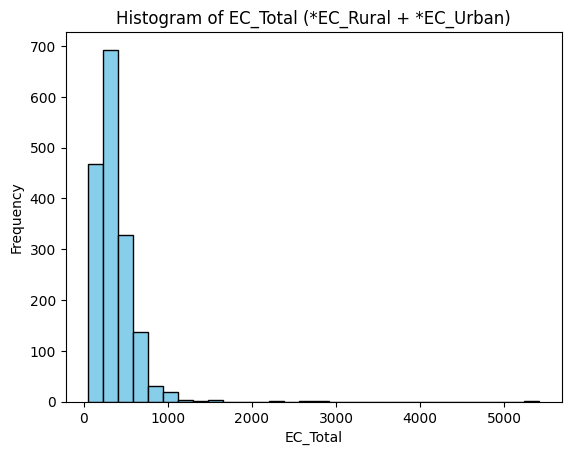

In [13]:
# Create a new column 'EC_Total' which is the sum of '*EC_Rural' and '*EC_Urban'
df_filtered['EC_Total'] = df_filtered['*EC_Rural'] + df_filtered['*EC_Urban']

# Create a histogram of 'EC_Total'
plt.hist(df_filtered['EC_Total'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('EC_Total')
plt.ylabel('Frequency')
plt.title('Histogram of EC_Total (*EC_Rural + *EC_Urban)')
plt.show()

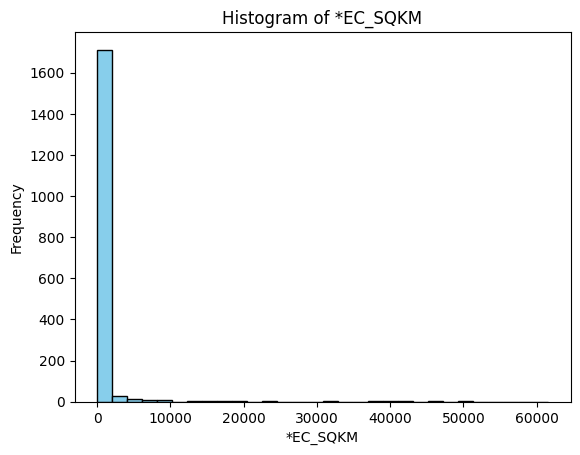

In [14]:
# Create a histogram of '*EC_SQKM'
plt.hist(df_filtered['*EC_SQKM'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('*EC_SQKM')
plt.ylabel('Frequency')
plt.title('Histogram of *EC_SQKM')
plt.show()

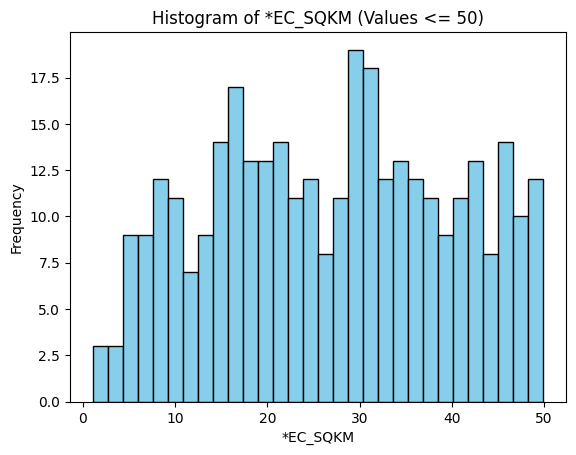

In [15]:
# Filter out rows where '*EC_SQKM' is over 50
df_filtered_50 = df_filtered[df_filtered['*EC_SQKM'] <= 50]

# Create a histogram of '*EC_SQKM' for the filtered data
plt.hist(df_filtered_50['*EC_SQKM'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('*EC_SQKM')
plt.ylabel('Frequency')
plt.title('Histogram of *EC_SQKM (Values <= 50)')
plt.show()

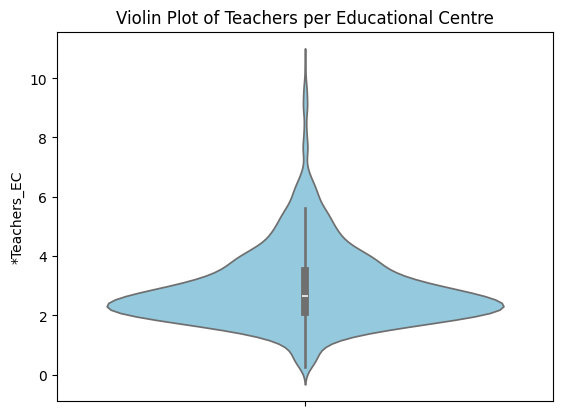

In [16]:
# Create a violin plot of 'teacher_ec'
sns.violinplot(y=df_filtered['*Teachers_EC'], color='skyblue')
plt.title('Violin Plot of Teachers per Educational Centre')
plt.show()

In [17]:
mean_teachers_ec = df_filtered['*Teachers_EC'].mean()

print(f"The mean of '*Teachers_EC' is {mean_teachers_ec}")

The mean of '*Teachers_EC' is 2.9418199880125635


In [18]:
# Filter out districts where '*Teachers_EC' is less than or equal to 1
df_less_equal_1 = df_filtered[df_filtered['*Teachers_EC'] <= 2.7]

# Count the number of such districts
num_districts = df_less_equal_1.shape[0]

# Calculate the total population in these districts
total_population = df_less_equal_1['*Pop_Total'].sum()

print(f"There are {num_districts} districts where '*Teachers_EC' is less than or equal to 1.")
print(f"The total population in these districts is {total_population}.")

There are 993 districts where '*Teachers_EC' is less than or equal to 1.
The total population in these districts is 4772380.


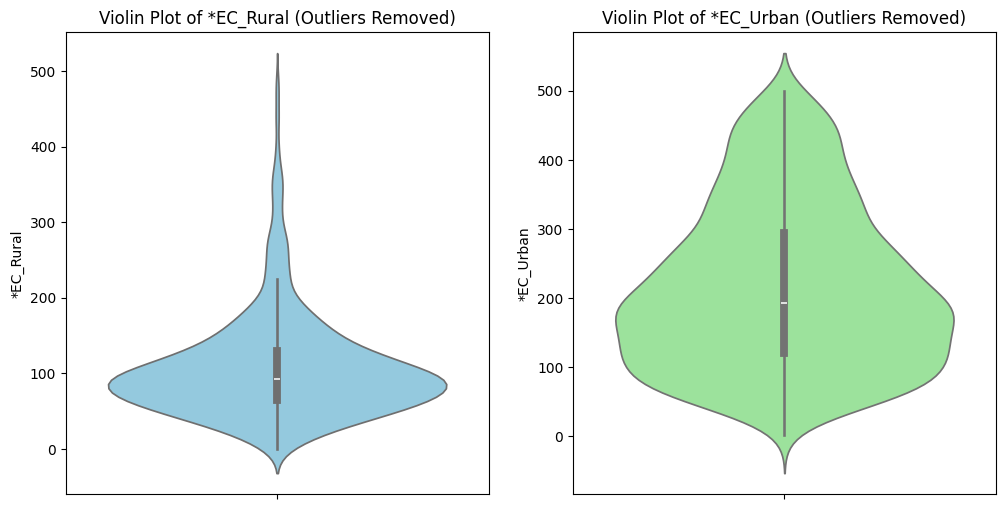

In [19]:
# Filter out rows where '*EC_Rural' or '*EC_Urban' is over 500
df_filtered = df_new[(df_new['*EC_Rural'] <= 500) & (df_new['*EC_Urban'] <= 500)]

# Create violin plots for the filtered data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(y=df_filtered['*EC_Rural'], color='skyblue')
plt.title('Violin Plot of *EC_Rural (Outliers Removed)')

plt.subplot(1, 2, 2)
sns.violinplot(y=df_filtered['*EC_Urban'], color='lightgreen')
plt.title('Violin Plot of *EC_Urban (Outliers Removed)')

plt.show()

In [20]:
unique_values = df_new['Agricultural Tipology 2'].unique()
unique_values

array([ 1.,  0., nan])

In [21]:
# h) Illiteracy and Agricultural Tipology

grouped = df_new.groupby('Agricultural Tipology 2')['*Illiteracy_Pop'].mean()
grouped

Agricultural Tipology 2
0.0    0.107788
1.0    0.065740
Name: *Illiteracy_Pop, dtype: float64

In [ ]:
### Through a groupby t-test, we concluded that with this Agricultural tipology classification there IS NOT relevant relationship towards Illiteracy cases per each 1,000 Squared Kilometres

In [22]:
# u) Poverty and Agricultural Tipology

grouped = df_new.groupby('Agricultural Tipology 2')['Poverty (%)'].mean()
grouped

Agricultural Tipology 2
0.0    37.878710
1.0    30.770707
Name: Poverty (%), dtype: float64

In [131]:
###  Through a groupby t-test, we concluded that with this Agricultural tipology classification there IS not relevant relationship towards Poverty cases having around 27% more poverty in the complex tipology category

In [23]:
pd.set_option('display.float_format', '{:.2f}'.format)

def analyze_columns(df, columns):
    results = {}
    for column in columns:
        lower_two_thirds = df[column].quantile(2/3)
        min_value = df[column].min()
        max_value = df[column].max()
        results[column] = (lower_two_thirds, min_value, max_value)
    return results

columns_to_analyze = ['Poverty (%)', '*D_Month-Income_PerCapita - Pounds', '*EC_SQKM', '*Illiteracy_Pop', '*Teachers_EC', 'Discrimination %', "Distritos's suspicious money laundry operations 2022", '*Cel_Pop', '*Int_Pop']
results = analyze_columns(df_new, columns_to_analyze)

results_df = pd.DataFrame(results, index=['Lower Two Thirds', 'Min', 'Max'])

results_df

,Poverty (%),*D_Month-Income_PerCapita - Pounds,*EC_SQKM,*Illiteracy_Pop,*Teachers_EC,Discrimination %,Distritos's suspicious money laundry operations 2022,*Cel_Pop,*Int_Pop
Lower Two Thirds,42.40,49.36,278.94,0.11,3.12,9.40,354.00,90.48,4.56
Min,0.10,3.61,1.05,0.00,0.25,2.80,9.00,2.71,0.00
Max,81.30,4772.87,61557.46,0.31,10.43,16.00,827.00,100.00,100.00


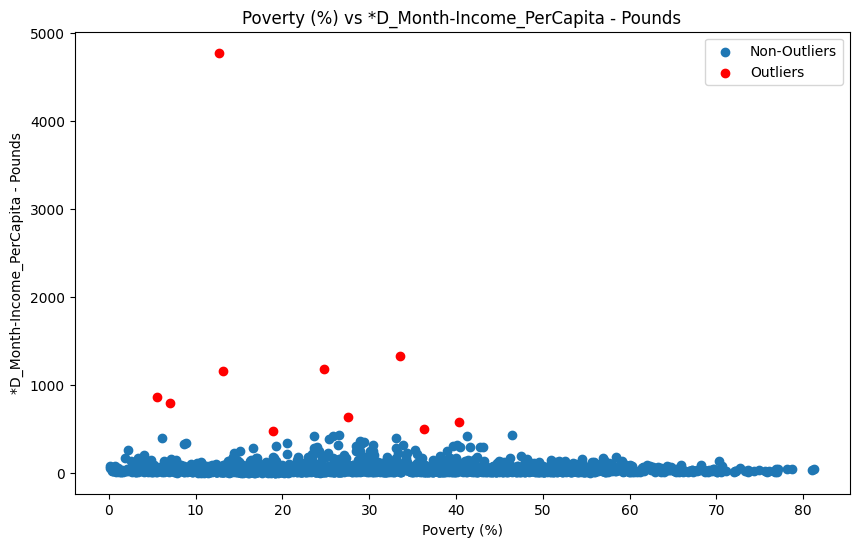

In [24]:
# EFFECT ON SOCIETAL VARIABLES 


# Calculate z-scores
df_new['Income_Zscore'] = zscore(df_new['*D_Month-Income_PerCapita - Pounds'])

# Create masks for outliers and non-outliers
outliers = df_new['Income_Zscore'].abs() > 3
non_outliers = ~outliers

plt.figure(figsize=(10, 6))

# Plot non-outliers
plt.scatter(df_new.loc[non_outliers, 'Poverty (%)'], df_new.loc[non_outliers, '*D_Month-Income_PerCapita - Pounds'], label='Non-Outliers')

# Plot outliers
plt.scatter(df_new.loc[outliers, 'Poverty (%)'], df_new.loc[outliers, '*D_Month-Income_PerCapita - Pounds'], color='red', label='Outliers')

plt.title('Poverty (%) vs *D_Month-Income_PerCapita - Pounds')
plt.xlabel('Poverty (%)')
plt.ylabel('*D_Month-Income_PerCapita - Pounds')
plt.legend()
plt.show()

In [25]:
# Calculate the minimum and maximum of 'Poverty (%)'
min_value = df_new['Poverty (%)'].min()
max_value = df_new['Poverty (%)'].max()

# Print the minimum and maximum
print('Minimum:', min_value)
print('Maximum:', max_value)

Minimum: 0.1
Maximum: 81.3


mean 57.61958691252519


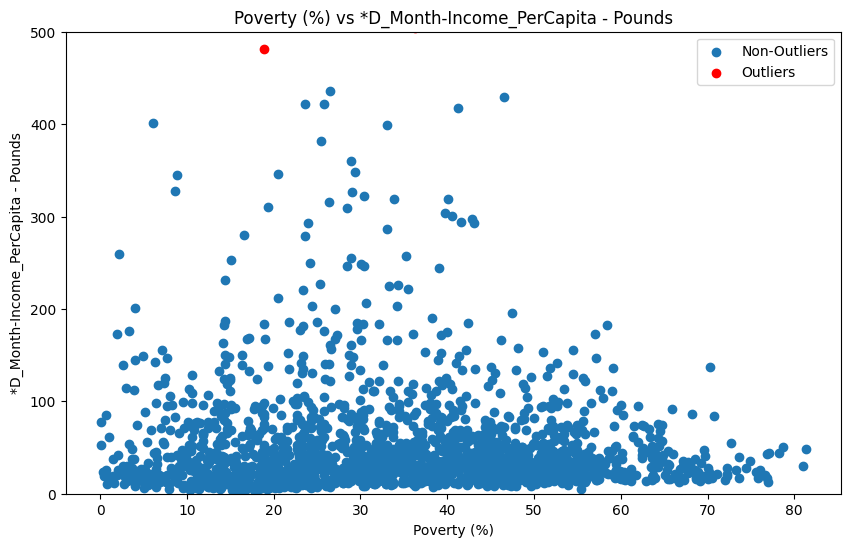

In [26]:
income_mean = df_new['*D_Month-Income_PerCapita - Pounds'].mean()
print("mean",income_mean)

plt.figure(figsize=(10, 6))

# Plot non-outliers
plt.scatter(df_new.loc[non_outliers, 'Poverty (%)'], df_new.loc[non_outliers, '*D_Month-Income_PerCapita - Pounds'], label='Non-Outliers')

# Plot outliers
plt.scatter(df_new.loc[outliers, 'Poverty (%)'], df_new.loc[outliers, '*D_Month-Income_PerCapita - Pounds'], color='red', label='Outliers')

plt.title('Poverty (%) vs *D_Month-Income_PerCapita - Pounds')
plt.xlabel('Poverty (%)')
plt.ylabel('*D_Month-Income_PerCapita - Pounds')
plt.ylim(0, 500)  # Set y-axis limits
plt.legend()
plt.show()

In [29]:
corr, p_value = pearsonr(df_filtered['Poverty (%)'], df_filtered['*D_Month-Income_PerCapita - Pounds'])

print(f"The Pearson correlation coefficient between 'Poverty (%)' and '*D_Month-Income_PerCapita - Pounds' is {corr}")
print(f"The p-value for testing non-correlation is {p_value}")

The Pearson correlation coefficient between 'Poverty (%)' and '*D_Month-Income_PerCapita - Pounds' is -0.10596497857988373
The p-value for testing non-correlation is 2.877455903063609e-05


57.61958691252519


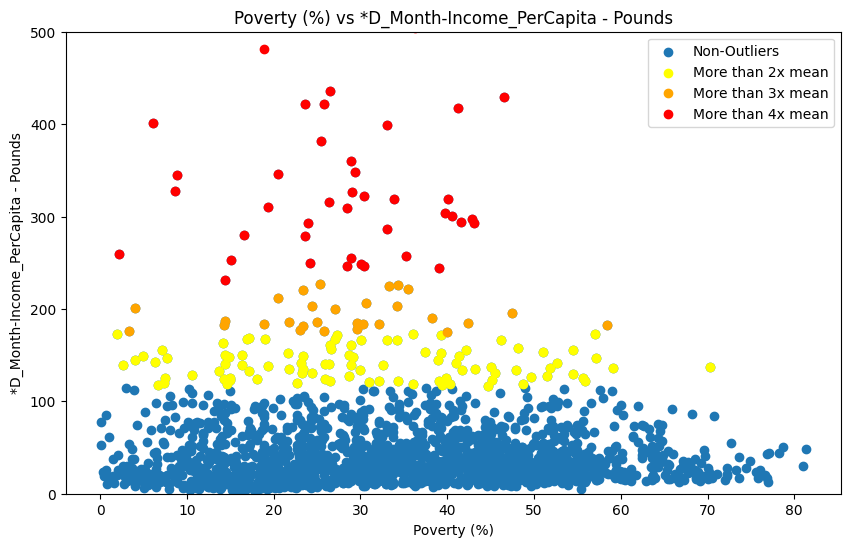

In [31]:
income_mean = df_new['*D_Month-Income_PerCapita - Pounds'].mean()
print(income_mean)

# Create masks for each condition
twice_mean = (df_new['*D_Month-Income_PerCapita - Pounds'] > 2 * income_mean) & (df_new['*D_Month-Income_PerCapita - Pounds'] <= 3 * income_mean)
thrice_mean = (df_new['*D_Month-Income_PerCapita - Pounds'] > 3 * income_mean) & (df_new['*D_Month-Income_PerCapita - Pounds'] <= 4 * income_mean)
more_than_four_times_mean = df_new['*D_Month-Income_PerCapita - Pounds'] > 4 * income_mean

plt.figure(figsize=(10, 6))

# Plot non-outliers
plt.scatter(df_new.loc[non_outliers, 'Poverty (%)'], df_new.loc[non_outliers, '*D_Month-Income_PerCapita - Pounds'], label='Non-Outliers')

# Plot values more than twice, thrice and four times the mean
plt.scatter(df_new.loc[twice_mean, 'Poverty (%)'], df_new.loc[twice_mean, '*D_Month-Income_PerCapita - Pounds'], color='yellow', label='More than 2x mean')
plt.scatter(df_new.loc[thrice_mean, 'Poverty (%)'], df_new.loc[thrice_mean, '*D_Month-Income_PerCapita - Pounds'], color='orange', label='More than 3x mean')
plt.scatter(df_new.loc[more_than_four_times_mean, 'Poverty (%)'], df_new.loc[more_than_four_times_mean, '*D_Month-Income_PerCapita - Pounds'], color='red', label='More than 4x mean')

plt.title('Poverty (%) vs *D_Month-Income_PerCapita - Pounds')
plt.xlabel('Poverty (%)')
plt.ylabel('*D_Month-Income_PerCapita - Pounds')
plt.ylim(0, 500)  # Set y-axis limits
plt.legend()
plt.show()

In [81]:
# Districts pained in yellow, orange and red are the ones with more than 2, 3 and 4 times the mean income per capita, respectively. If we look at the once with higher rates of poverty, it would be relevant to analyze them deeply since those could be classified even more as with inequality within the same district. So causes could be explored, such as corruption.

In [32]:
# Filter the DataFrame
filtered_df = df_new[(df_new['Poverty (%)'] > 30) & ((thrice_mean) | (more_than_four_times_mean))]

# Print the values in the third column
filtered_df.iloc[:, 2].tolist()

['BOLOGNESI',
 'HUARI',
 'HUARI',
 'HUARI',
 'HUARI',
 'HUARI',
 'HUARI',
 'HUARI',
 'HUARI',
 'HUARI',
 'HUARI',
 'HUARI',
 'OCROS',
 'PALLASCA',
 'COTABAMBAS',
 'CAYLLOMA',
 'CAYLLOMA',
 'LA UNION',
 'PAUCAR DEL SARA SARA',
 'PAUCAR DEL SARA SARA',
 'PAUCAR DEL SARA SARA',
 'SUCRE',
 'ESPINAR',
 'ESPINAR',
 'LA CONVENCION',
 'LA CONVENCION',
 'LA CONVENCION',
 'LA CONVENCION',
 'LA CONVENCION',
 'CHINCHA',
 'PATAZ']

In [33]:
# Classifying districts by their values, if they belong to the worse 1/3 then they are classified as 1, otherwise 0

pd.set_option('display.float_format', '{:.2f}'.format)

def analyze_columns1(df, columns):
    results = {}
    special_columns = ['Poverty (%)', '*Illiteracy_SQKM', 'Discrimination %', "Distritos's suspicious money laundry operations 2022"]
    for column in columns:
        if column in special_columns:
            limit = df[column].quantile(1/3)
            df_new['_class' + column] = df_new[column].apply(lambda x: 1 if x > limit else 0)
        else:
            limit = df[column].quantile(2/3)
            df_new['_class' + column] = df_new[column].apply(lambda x: 1 if x < limit else 0)
        min_value = df[column].min()
        max_value = df[column].max()
        results[column] = (limit, min_value, max_value)
        
    return results

columns_to_analyze = ['Poverty (%)', '*D_Month-Income_PerCapita - Pounds', '*EC_SQKM', '*Illiteracy_Pop', '*Teachers_EC', 'Discrimination %', "Distritos's suspicious money laundry operations 2022", '*Cel_Pop', '*Int_Pop']
results = analyze_columns1(df_new, columns_to_analyze)

results_df = pd.DataFrame(results, index=['Limit', 'Min', 'Max'])

results_df

,Poverty (%),*D_Month-Income_PerCapita - Pounds,*EC_SQKM,*Illiteracy_Pop,*Teachers_EC,Discrimination %,Distritos's suspicious money laundry operations 2022,*Cel_Pop,*Int_Pop
Limit,25.00,49.36,278.94,0.11,3.12,5.80,149.00,90.48,4.56
Min,0.10,3.61,1.05,0.00,0.25,2.80,9.00,2.71,0.00
Max,81.30,4772.87,61557.46,0.31,10.43,16.00,827.00,100.00,100.00


In [34]:
df_new

,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop
0,10202,AMAZONAS,BAGUA,ARAMANGO,BAGUAARAMANGO,7552,2935,98,16,1002,119,113,6.50,30.75,24.22,7.34,473.00,6678.30,106.38,38.50,322,680,1.00,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1
1,10201,AMAZONAS,BAGUA,BAGUA,BAGUABAGUA,2595,26241,8,53,1140,179,211,9.80,175.70,24.11,22.92,473.00,24762.90,3215.04,16.20,324,817,1.00,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0
2,10203,AMAZONAS,BAGUA,COPALLIN,BAGUACOPALLIN,2505,2467,30,12,546,48,34,6.70,18.24,3.31,3.65,473.00,4085.78,122.14,24.50,175,371,1.00,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1
3,10204,AMAZONAS,BAGUA,EL PARCO,BAGUAEL PARCO,622,671,5,4,106,8,8,7.40,8.91,3.43,2.59,473.00,949.54,11.82,35.20,31,74,1.00,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1
4,10205,AMAZONAS,BAGUA,IMAZA,BAGUAIMAZA,24475,5377,301,22,2192,414,304,7.20,68.33,13.71,16.57,473.00,7257.48,82.74,53.90,538,1654,1.00,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250303,UCAYALI,PADRE ABAD,CURIMANA,PADRE ABADCURIMANA,4831,4327,60,8,364,83,72,7.30,59.71,15.23,13.12,293.00,4806.80,86.68,9.00,120,244,1.00,1531.13,5.20,80.52,540.88,44.41,5.98,1.69,2.28,25.06,9158,364,0.04,52.49,0.95,-0.24,0,1,1,1,1,0,1,1,1
1870,250302,UCAYALI,PADRE ABAD,IRAZOLA,PADRE ABADIRAZOLA,4019,6922,45,16,760,90,61,6.90,47.33,12.48,10.15,293.00,7048.66,275.80,12.90,248,511,1.00,2406.51,5.20,89.31,432.62,25.35,4.55,1.38,2.48,16.23,10941,759,0.07,64.42,2.52,-0.31,0,1,1,1,1,0,1,1,1
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,PADRE ABADNESHUYA,4485,4518,52,7,317,76,68,7.80,78.29,12.15,8.42,293.00,6276.42,240.34,11.90,101,216,NaN,NaN,5.20,86.25,645.43,NaN,NaN,1.60,2.44,16.36,9003,317,0.04,69.71,2.67,-0.31,0,1,0,1,1,0,1,1,1
1872,250301,UCAYALI,PADRE ABAD,PADRE ABAD,PADRE ABADPADRE ABAD,7756,27063,82,56,1846,256,213,8.10,224.59,34.54,39.98,293.00,25038.70,2379.76,9.40,617,1229,1.00,3834.17,5.20,94.59,483.27,35.99,9.08,1.35,3.40,20.10,34819,1846,0.05,71.91,6.83,-0.28,0,1,1,1,0,0,1,1,0


In [35]:
df_new['Vulnerability_Score'] = df_new.iloc[:, -9:].sum(axis=1)
df_new

,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score
0,10202,AMAZONAS,BAGUA,ARAMANGO,BAGUAARAMANGO,7552,2935,98,16,1002,119,113,6.50,30.75,24.22,7.34,473.00,6678.30,106.38,38.50,322,680,1.00,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1,9
1,10201,AMAZONAS,BAGUA,BAGUA,BAGUABAGUA,2595,26241,8,53,1140,179,211,9.80,175.70,24.11,22.92,473.00,24762.90,3215.04,16.20,324,817,1.00,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0,5
2,10203,AMAZONAS,BAGUA,COPALLIN,BAGUACOPALLIN,2505,2467,30,12,546,48,34,6.70,18.24,3.31,3.65,473.00,4085.78,122.14,24.50,175,371,1.00,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1,6
3,10204,AMAZONAS,BAGUA,EL PARCO,BAGUAEL PARCO,622,671,5,4,106,8,8,7.40,8.91,3.43,2.59,473.00,949.54,11.82,35.20,31,74,1.00,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1,8
4,10205,AMAZONAS,BAGUA,IMAZA,BAGUAIMAZA,24475,5377,301,22,2192,414,304,7.20,68.33,13.71,16.57,473.00,7257.48,82.74,53.90,538,1654,1.00,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250303,UCAYALI,PADRE ABAD,CURIMANA,PADRE ABADCURIMANA,4831,4327,60,8,364,83,72,7.30,59.71,15.23,13.12,293.00,4806.80,86.68,9.00,120,244,1.00,1531.13,5.20,80.52,540.88,44.41,5.98,1.69,2.28,25.06,9158,364,0.04,52.49,0.95,-0.24,0,1,1,1,1,0,1,1,1,7
1870,250302,UCAYALI,PADRE ABAD,IRAZOLA,PADRE ABADIRAZOLA,4019,6922,45,16,760,90,61,6.90,47.33,12.48,10.15,293.00,7048.66,275.80,12.90,248,511,1.00,2406.51,5.20,89.31,432.62,25.35,4.55,1.38,2.48,16.23,10941,759,0.07,64.42,2.52,-0.31,0,1,1,1,1,0,1,1,1,7
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,PADRE ABADNESHUYA,4485,4518,52,7,317,76,68,7.80,78.29,12.15,8.42,293.00,6276.42,240.34,11.90,101,216,NaN,NaN,5.20,86.25,645.43,NaN,NaN,1.60,2.44,16.36,9003,317,0.04,69.71,2.67,-0.31,0,1,0,1,1,0,1,1,1,6
1872,250301,UCAYALI,PADRE ABAD,PADRE ABAD,PADRE ABADPADRE ABAD,7756,27063,82,56,1846,256,213,8.10,224.59,34.54,39.98,293.00,25038.70,2379.76,9.40,617,1229,1.00,3834.17,5.20,94.59,483.27,35.99,9.08,1.35,3.40,20.10,34819,1846,0.05,71.91,6.83,-0.28,0,1,1,1,0,0,1,1,0,5


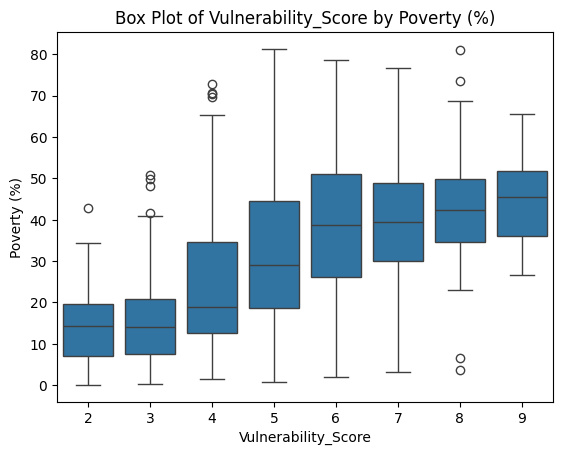

In [36]:
# Create a box plot
sns.boxplot(x='Vulnerability_Score', y='Poverty (%)', data=df_new)
plt.title('Box Plot of Vulnerability_Score by Poverty (%)')
plt.show()

In [37]:
# Calculate the Pearson correlation coefficient and the p-value
pearson_coef, p_value = stats.pearsonr(df_new['_classPoverty (%)'], df_new['_class*D_Month-Income_PerCapita - Pounds'])

print("Pearson Correlation Coefficient: ", pearson_coef)
print("P-value: ", p_value)

Pearson Correlation Coefficient:  0.01013142634442196
P-value:  0.6611650295467996


In [ ]:
# There is no significant linear relationship between the two variables

In [38]:
df_new = df_new.replace([np.inf, -np.inf], np.nan)

In [40]:
# Replace infinite values with NaNs
df_new['Poverty (%)'] = df_new['Poverty (%)'].replace([np.inf, -np.inf], np.nan)
df_new['*EC_SQKM'] = df_new['*EC_SQKM'].replace([np.inf, -np.inf], np.nan)

# Replace NaNs with the mean of the column
df_new['Poverty (%)'].fillna(df_new['Poverty (%)'].mean(), inplace=True)
df_new['*EC_SQKM'].fillna(df_new['*EC_SQKM'].mean(), inplace=True)

# Calculate the Pearson correlation coefficient and the p-value
pearson_coef, p_value = stats.pearsonr(df_new['Poverty (%)'], df_new['*EC_SQKM'])

print("Pearson Correlation Coefficient: ", pearson_coef)
print("P-value: ", p_value)

Pearson Correlation Coefficient:  -0.2507867817288988
P-value:  2.8659841783430758e-28


/var/folders/n0/38c81twx5113rcypg07k6l080000gn/T/ipykernel_1135/717891533.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['Poverty (%)'].fillna(df_new['Poverty (%)'].mean(), inplace=True)
/var/folders/n0/38c81twx5113rcypg07k6l080000gn/T/ipykernel_1135/717891533.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [ ]:
# There is a weak but statistically significant negative linear relationship between 'Poverty (%)' and '*EC_SQKM' in your dataset. This means that as 'Poverty (%)' increases, '*EC_SQKM' tends to decrease, and vice versa.

In [41]:
# Calculate the Pearson correlation coefficient and the p-value
pearson_coef, p_value = stats.pearsonr(df_new['*Illiteracy_Pop'], df_new['*EC_SQKM'])

print("Pearson Correlation Coefficient: ", pearson_coef)
print("P-value: ", p_value)

Pearson Correlation Coefficient:  -0.2270814532042717
P-value:  2.421306093455713e-23


In [ ]:
# There is a weak but statistically significant linear relationship between the poverty class and the educational centres per squared kilometre class  

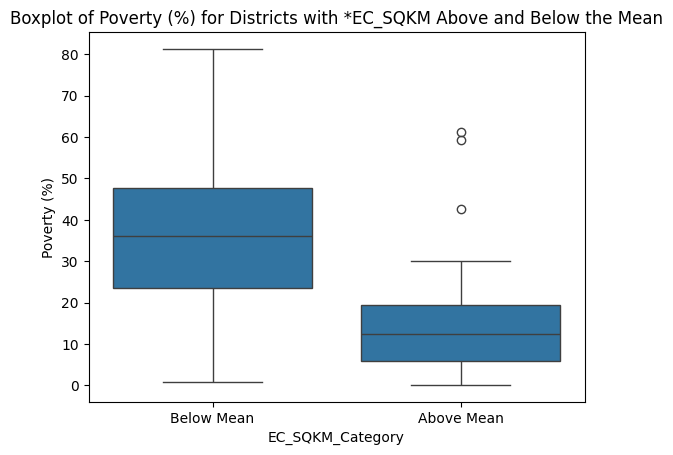

In [42]:
# Calculate the mean of '*EC_SQKM'
mean_EC_SQKM = df_new['*EC_SQKM'].mean()

# Create a new categorical variable that indicates whether '*EC_SQKM' is above or below the mean
df_new['EC_SQKM_Category'] = ['Above Mean' if x > mean_EC_SQKM else 'Below Mean' for x in df_new['*EC_SQKM']]

# Create a boxplot of 'Poverty (%)' for each category
sns.boxplot(x='EC_SQKM_Category', y='Poverty (%)', data=df_new)
plt.title('Boxplot of Poverty (%) for Districts with *EC_SQKM Above and Below the Mean')
plt.show()

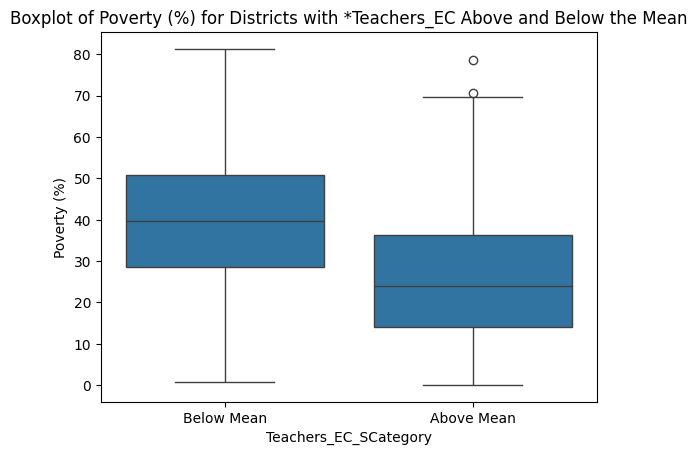

In [43]:
# Calculate the mean of '*EC_SQKM'
mean_EC_SQKM = df_new['*Teachers_EC'].mean()

# Create a new categorical variable that indicates whether '*EC_SQKM' is above or below the mean
df_new['Teachers_EC_SCategory'] = ['Above Mean' if x > mean_EC_SQKM else 'Below Mean' for x in df_new['*Teachers_EC']]

# Create a boxplot of 'Poverty (%)' for each category
sns.boxplot(x='Teachers_EC_SCategory', y='Poverty (%)', data=df_new)
plt.title('Boxplot of Poverty (%) for Districts with *Teachers_EC Above and Below the Mean')
plt.show()

In [102]:
df_new

,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score,EC_SQKM_Category,Teachers_EC_SCategory,Total Education Centres - 2019,Poverty (%) Normalized
0,10202,AMAZONAS,BAGUA,ARAMANGO,BAGUAARAMANGO,7552,2935,98,16,1002,119,113,6.50,30.75,24.22,7.34,473.00,6678.30,106.38,38.50,322,680,1.00,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,114,48.29
1,10201,AMAZONAS,BAGUA,BAGUA,BAGUABAGUA,2595,26241,8,53,1140,179,211,9.80,175.70,24.11,22.92,473.00,24762.90,3215.04,16.20,324,817,1.00,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0,5,Below Mean,Above Mean,61,20.83
2,10203,AMAZONAS,BAGUA,COPALLIN,BAGUACOPALLIN,2505,2467,30,12,546,48,34,6.70,18.24,3.31,3.65,473.00,4085.78,122.14,24.50,175,371,1.00,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1,6,Below Mean,Below Mean,42,31.05
3,10204,AMAZONAS,BAGUA,EL PARCO,BAGUAEL PARCO,622,671,5,4,106,8,8,7.40,8.91,3.43,2.59,473.00,949.54,11.82,35.20,31,74,1.00,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1,8,Below Mean,Below Mean,9,44.23
4,10205,AMAZONAS,BAGUA,IMAZA,BAGUAIMAZA,24475,5377,301,22,2192,414,304,7.20,68.33,13.71,16.57,473.00,7257.48,82.74,53.90,538,1654,1.00,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,323,67.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250303,UCAYALI,PADRE ABAD,CURIMANA,PADRE ABADCURIMANA,4831,4327,60,8,364,83,72,7.30,59.71,15.23,13.12,293.00,4806.80,86.68,9.00,120,244,1.00,1531.13,5.20,80.52,540.88,44.41,5.98,1.69,2.28,25.06,9158,364,0.04,52.49,0.95,-0.24,0,1,1,1,1,0,1,1,1,7,Below Mean,Below Mean,68,11.96
1870,250302,UCAYALI,PADRE ABAD,IRAZOLA,PADRE ABADIRAZOLA,4019,6922,45,16,760,90,61,6.90,47.33,12.48,10.15,293.00,7048.66,275.80,12.90,248,511,1.00,2406.51,5.20,89.31,432.62,25.35,4.55,1.38,2.48,16.23,10941,759,0.07,64.42,2.52,-0.31,0,1,1,1,1,0,1,1,1,7,Below Mean,Below Mean,61,16.76
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,PADRE ABADNESHUYA,4485,4518,52,7,317,76,68,7.80,78.29,12.15,8.42,293.00,6276.42,240.34,11.90,101,216,NaN,NaN,5.20,86.25,645.43,1127.10,NaN,1.60,2.44,16.36,9003,317,0.04,69.71,2.67,-0.31,0,1,0,1,1,0,1,1,1,6,Below Mean,Below Mean,59,15.53
1872,250301,UCAYALI,PADRE ABAD,PADRE ABAD,PADRE ABADPADRE ABAD,7756,27063,82,56,1846,256,213,8.10,224.59,34.54,39.98,293.00,25038.70,2379.76,9.40,617,1229,1.00,3834.17,5.20,94.59,483.27,35.99,9.08,1.35,3.40,20.10,34819,1846,0.05,71.91,6.83,-0.28,0,1,1,1,0,0,1,1,0,5,Below Mean,Above Mean,138,12.45


In [44]:
# Calculate the Pearson correlation coefficient and the p-value
pearson_coef, p_value = stats.pearsonr(df_new['_class*Illiteracy_Pop'], df_new['_class*EC_SQKM'])

print("Pearson Correlation Coefficient: ", pearson_coef)
print("P-value: ", p_value)

Pearson Correlation Coefficient:  0.04228463812781838
P-value:  0.06723687526460036


In [46]:
# Replace inf values with NaN
df_new = df_new.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values
df_new = df_new.dropna(subset=['*Illiteracy_Pop', '*EC_SQKM'])

# Calculate the Pearson correlation coefficient and the p-value
pearson_coef, p_value = stats.pearsonr(df_new['*Illiteracy_Pop'], df_new['*EC_SQKM'])

print("Pearson Correlation Coefficient: ", pearson_coef)
print("P-value: ", p_value)

Pearson Correlation Coefficient:  -0.2270814532042717
P-value:  2.421306093455713e-23


In [103]:
# Select the columns
columns = ['Poverty (%)', '*D_Month-Income_PerCapita - Pounds', '*EC_SQKM', '*Illiteracy_Pop', '*Teachers_EC', 'Discrimination %', "Distritos's suspicious money laundry operations 2022", 'Average Years of Study']
df_selected = df_new[columns]

# Compute the correlation matrix
corr_matrix = df_selected.corr()

corr_matrix

,Poverty (%),*D_Month-Income_PerCapita - Pounds,*EC_SQKM,*Illiteracy_Pop,*Teachers_EC,Discrimination %,Distritos's suspicious money laundry operations 2022,Average Years of Study
Poverty (%),1.00,-0.07,-0.25,0.65,-0.41,-0.30,-0.03,-0.78
*D_Month-Income_PerCapita - Pounds,-0.07,1.00,-0.05,-0.02,-0.08,0.16,0.06,0.03
*EC_SQKM,-0.25,-0.05,1.00,-0.23,0.37,0.16,0.19,0.40
*Illiteracy_Pop,0.65,-0.02,-0.23,1.00,-0.33,-0.21,-0.11,-0.79
*Teachers_EC,-0.41,-0.08,0.37,-0.33,1.00,0.08,0.04,0.56
Discrimination %,-0.30,0.16,0.16,-0.21,0.08,1.00,0.47,0.34
Distritos's suspicious money laundry operations 2022,-0.03,0.06,0.19,-0.11,0.04,0.47,1.00,0.10
Average Years of Study,-0.78,0.03,0.40,-0.79,0.56,0.34,0.10,1.00


In [104]:
corr_matrix.to_csv('corr_matrix.csv')

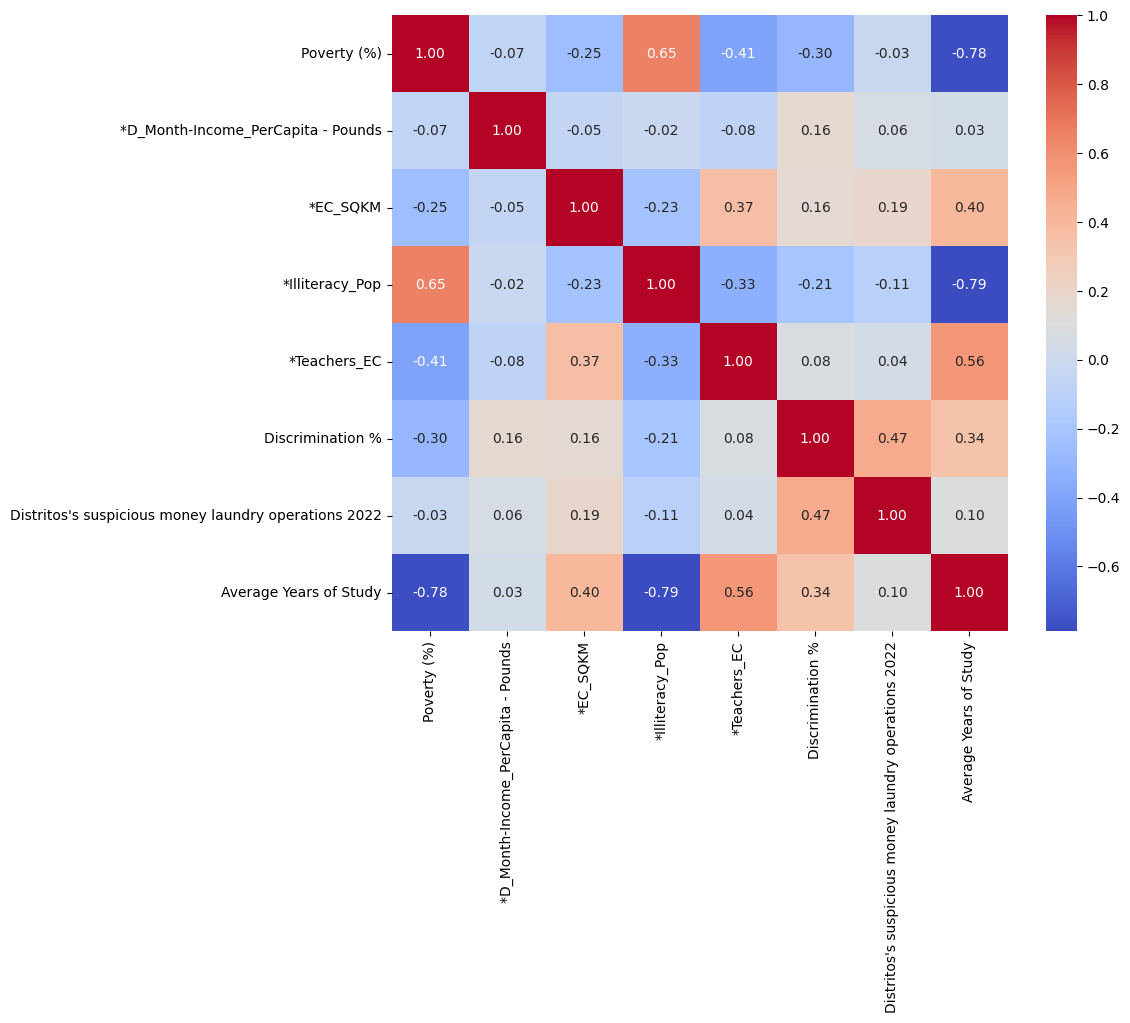

In [48]:
# Create a heatmap from the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

In [ ]:
# Most interesting correlations are

# -1) Average years of stufy and illiteracy
# 0) Povery and Average Years of Study
# 1) Poverty and literacy,
# 2) Money laundry and discrimination,
# 3) Poverty and teachers per educational centre,
# 4) Poverty and discrimination
# 5) Teachers per EC and iliteracy
# 6) Average years of study and discrimination

# There is no correlation at all between the income per capita of municipalities and the rest of the variables, which is very disappointing


The correlation between 'Poverty (%)' and 'Average Years of Study' is -0.7792506684677347


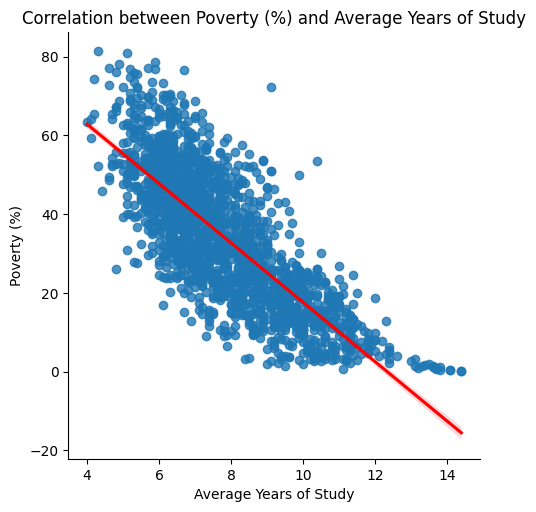

In [49]:
correlation = df_new['Poverty (%)'].corr(df_new['Average Years of Study'])
print(f"The correlation between 'Poverty (%)' and 'Average Years of Study' is {correlation}")

sns.lmplot(x='Average Years of Study', y='Poverty (%)', data=df_new, line_kws={'color': 'red'})
plt.title('Correlation between Poverty (%) and Average Years of Study')
plt.show()

In [50]:
df_new

,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score,EC_SQKM_Category,Teachers_EC_SCategory
0,10202,AMAZONAS,BAGUA,ARAMANGO,BAGUAARAMANGO,7552,2935,98,16,1002,119,113,6.50,30.75,24.22,7.34,473.00,6678.30,106.38,38.50,322,680,1.00,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean
1,10201,AMAZONAS,BAGUA,BAGUA,BAGUABAGUA,2595,26241,8,53,1140,179,211,9.80,175.70,24.11,22.92,473.00,24762.90,3215.04,16.20,324,817,1.00,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0,5,Below Mean,Above Mean
2,10203,AMAZONAS,BAGUA,COPALLIN,BAGUACOPALLIN,2505,2467,30,12,546,48,34,6.70,18.24,3.31,3.65,473.00,4085.78,122.14,24.50,175,371,1.00,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1,6,Below Mean,Below Mean
3,10204,AMAZONAS,BAGUA,EL PARCO,BAGUAEL PARCO,622,671,5,4,106,8,8,7.40,8.91,3.43,2.59,473.00,949.54,11.82,35.20,31,74,1.00,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1,8,Below Mean,Below Mean
4,10205,AMAZONAS,BAGUA,IMAZA,BAGUAIMAZA,24475,5377,301,22,2192,414,304,7.20,68.33,13.71,16.57,473.00,7257.48,82.74,53.90,538,1654,1.00,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250303,UCAYALI,PADRE ABAD,CURIMANA,PADRE ABADCURIMANA,4831,4327,60,8,364,83,72,7.30,59.71,15.23,13.12,293.00,4806.80,86.68,9.00,120,244,1.00,1531.13,5.20,80.52,540.88,44.41,5.98,1.69,2.28,25.06,9158,364,0.04,52.49,0.95,-0.24,0,1,1,1,1,0,1,1,1,7,Below Mean,Below Mean
1870,250302,UCAYALI,PADRE ABAD,IRAZOLA,PADRE ABADIRAZOLA,4019,6922,45,16,760,90,61,6.90,47.33,12.48,10.15,293.00,7048.66,275.80,12.90,248,511,1.00,2406.51,5.20,89.31,432.62,25.35,4.55,1.38,2.48,16.23,10941,759,0.07,64.42,2.52,-0.31,0,1,1,1,1,0,1,1,1,7,Below Mean,Below Mean
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,PADRE ABADNESHUYA,4485,4518,52,7,317,76,68,7.80,78.29,12.15,8.42,293.00,6276.42,240.34,11.90,101,216,NaN,NaN,5.20,86.25,645.43,1127.10,NaN,1.60,2.44,16.36,9003,317,0.04,69.71,2.67,-0.31,0,1,0,1,1,0,1,1,1,6,Below Mean,Below Mean
1872,250301,UCAYALI,PADRE ABAD,PADRE ABAD,PADRE ABADPADRE ABAD,7756,27063,82,56,1846,256,213,8.10,224.59,34.54,39.98,293.00,25038.70,2379.76,9.40,617,1229,1.00,3834.17,5.20,94.59,483.27,35.99,9.08,1.35,3.40,20.10,34819,1846,0.05,71.91,6.83,-0.28,0,1,1,1,0,0,1,1,0,5,Below Mean,Above Mean


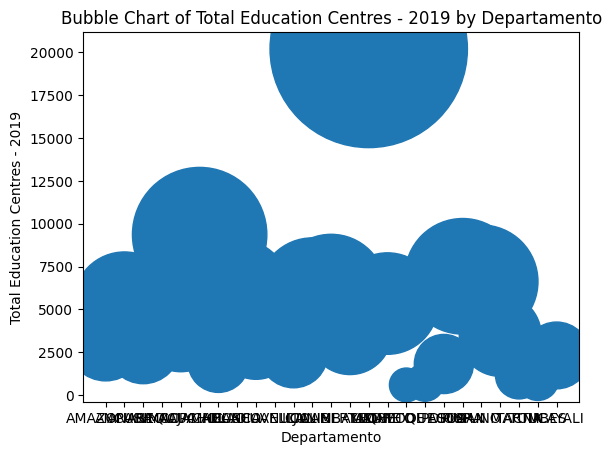

In [51]:

col1 = df_new.columns[7] 
col2 = df_new.columns[8]

# Sum the 7th and 8th columns and create a new column 'Total Education Centres - 2019'
df_new['Total Education Centres - 2019'] = df_new[col1] + df_new[col2]

# Group by 'Departamento' and sum the 'Total Education Centres - 2019' for each 'Departamento'
df_grouped = df_new.groupby('Departamento')['Total Education Centres - 2019'].sum().reset_index()

# Create a bubble chart with 'Departamento' on the x-axis and 'Total Education Centres - 2019' on the y-axis
plt.scatter(df_grouped['Departamento'], df_grouped['Total Education Centres - 2019'], s=df_grouped['Total Education Centres - 2019'])
plt.xlabel('Departamento')
plt.ylabel('Total Education Centres - 2019')
plt.title('Bubble Chart of Total Education Centres - 2019 by Departamento')
plt.show()

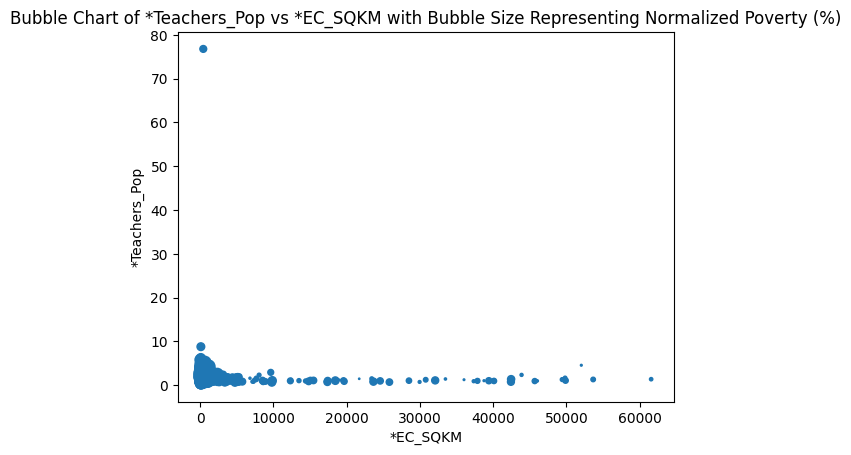

In [52]:
# Normalize 'Poverty (%)' to range between 1 and 100
df_new['Poverty (%) Normalized'] = (df_new['Poverty (%)'] - df_new['Poverty (%)'].min()) / (df_new['Poverty (%)'].max() - df_new['Poverty (%)'].min()) * 100 + 1

# Create a bubble chart with '*EC_SQKM' on the x-axis, '*Teachers_Pop' on the y-axis, and the size of the bubbles representing 'Poverty (%) Normalized'
plt.scatter(df_new['*EC_SQKM'], df_new['*Teachers_Pop'], s=df_new['Poverty (%) Normalized'])
plt.xlabel('*EC_SQKM')
plt.ylabel('*Teachers_Pop')
plt.title('Bubble Chart of *Teachers_Pop vs *EC_SQKM with Bubble Size Representing Normalized Poverty (%)')
plt.show()

In [53]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df_new['Poverty (%)'], df_new['Average Years of Study'])
print(f"The correlation between 'Poverty (%)' and 'Average Years of Study' is {correlation} with a p-value of {p_value}")

The correlation between 'Poverty (%)' and 'Average Years of Study' is -0.7792506684677347 with a p-value of 0.0


In [54]:
import statsmodels.api as sm

# Assuming 'Average_Years_of_Study' and 'Poverty (%)' are the column names in your dataframe df_new
X = df_new['Average Years of Study']
y = df_new['Poverty (%)']

# Add a constant to the independent value
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X)
results = model.fit()

# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Poverty (%)   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2894.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:10:21   Log-Likelihood:                -7081.9
No. Observations:                1874   AIC:                         1.417e+04
Df Residuals:                    1872   BIC:                         1.418e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     92

In [ ]:
# p-value is is near 0.000 so there is a correlation that is statistically significant

In [55]:
df_new.to_csv('new_df.csv', index=False)

In [56]:
import geopandas as gpd

# Load GeoJSON file
df_geo = gpd.read_file('/Users/santiagowon/Dropbox/Santiago/01. Maestria/Critical Data Representation and Analysis/Final Project/bbdd/SOURCES/peru_distrital_simple.geojson')

# Print the DataFrame
df_geo

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry
0,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.57,0.02,0.57,0.02,18834.14,"POLYGON ((-70.14409 -18.09309, -70.17512 -18.1..."
1,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.88,0.02,0.90,0.02,27073.52,"POLYGON ((-69.90467 -17.95829, -69.98287 -18.0..."
2,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.45,0.01,0.45,0.01,11063.99,"POLYGON ((-70.09201 -17.98026, -70.17243 -18.0..."
3,4,230101,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.76,0.21,2.76,0.21,246365.27,"POLYGON ((-70.23500 -17.99231, -70.23710 -18.0..."
4,5,230109,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.52,0.10,1.51,0.10,113953.51,"POLYGON ((-70.42374 -17.88983, -70.51323 -17.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1830,160303,16,1603,TIGRE,LORETO,LORETO,LEY,9815,02/07/1943,INTUTU,9.21,1.64,9.18,1.64,2011378.30,"POLYGON ((-74.96515 -2.36565, -74.94959 -2.458..."
1830,1831,160107,16,1601,NAPO,MAYNAS,LORETO,LEY,9815,02/07/1943,SANTA CLOTILDE,11.38,1.99,11.36,1.99,2440805.01,"POLYGON ((-72.93790 -2.83906, -72.97311 -2.930..."
1831,1832,160109,16,1601,PUTUMAYO,MAYNAS,LORETO,LEY,9815,02/07/1943,SAN ANTONIO DEL ESTRECHO,16.26,2.88,16.23,2.88,3555516.31,"POLYGON ((-73.53075 -1.45793, -73.47857 -1.522..."
1832,1833,160110,16,1601,TORRES CAUSANA,MAYNAS,LORETO,LEY,9815,02/07/1943,PANTOJA,6.59,0.61,6.57,0.61,749185.08,"POLYGON ((-74.87370 -0.95012, -74.88779 -1.006..."


In [57]:
# Create a new column in df_geo that merges 'NOMBPROV' and 'NOMBDIST'
df_geo['Prov_Dist'] = df_geo['NOMBPROV'] + df_geo['NOMBDIST']
df_geo


,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,Prov_Dist
0,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.57,0.02,0.57,0.02,18834.14,"POLYGON ((-70.14409 -18.09309, -70.17512 -18.1...",TACNACORONEL GREGORIO ALBARRACIN LANCHIPA
1,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.88,0.02,0.90,0.02,27073.52,"POLYGON ((-69.90467 -17.95829, -69.98287 -18.0...",TACNAPOCOLLAY
2,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.45,0.01,0.45,0.01,11063.99,"POLYGON ((-70.09201 -17.98026, -70.17243 -18.0...",TACNACALANA
3,4,230101,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.76,0.21,2.76,0.21,246365.27,"POLYGON ((-70.23500 -17.99231, -70.23710 -18.0...",TACNATACNA
4,5,230109,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.52,0.10,1.51,0.10,113953.51,"POLYGON ((-70.42374 -17.88983, -70.51323 -17.9...",TACNASAMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1830,160303,16,1603,TIGRE,LORETO,LORETO,LEY,9815,02/07/1943,INTUTU,9.21,1.64,9.18,1.64,2011378.30,"POLYGON ((-74.96515 -2.36565, -74.94959 -2.458...",LORETOTIGRE
1830,1831,160107,16,1601,NAPO,MAYNAS,LORETO,LEY,9815,02/07/1943,SANTA CLOTILDE,11.38,1.99,11.36,1.99,2440805.01,"POLYGON ((-72.93790 -2.83906, -72.97311 -2.930...",MAYNASNAPO
1831,1832,160109,16,1601,PUTUMAYO,MAYNAS,LORETO,LEY,9815,02/07/1943,SAN ANTONIO DEL ESTRECHO,16.26,2.88,16.23,2.88,3555516.31,"POLYGON ((-73.53075 -1.45793, -73.47857 -1.522...",MAYNASPUTUMAYO
1832,1833,160110,16,1601,TORRES CAUSANA,MAYNAS,LORETO,LEY,9815,02/07/1943,PANTOJA,6.59,0.61,6.57,0.61,749185.08,"POLYGON ((-74.87370 -0.95012, -74.88779 -1.006...",MAYNASTORRES CAUSANA


In [58]:
df_geo.to_csv('geo_df.csv', index=False)

In [59]:
# Merge df_geo and df_new on the new column and 'Prov + Distrito'
merged_df = pd.merge(df_geo, df_new, left_on='Prov_Dist', right_on='Prov + Distrito', how='inner')


merged_df

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,Prov_Dist,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score,EC_SQKM_Category,Teachers_EC_SCategory,Total Education Centres - 2019,Poverty (%) Normalized
0,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.57,0.02,0.57,0.02,18834.14,"POLYGON ((-70.14409 -18.09309, -70.17512 -18.1...",TACNACORONEL GREGORIO ALBARRACIN LANCHIPA,230110,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNACORONEL GREGORIO ALBARRACIN LANCHIPA,357,116279,0,167,2198,325,335,10.80,556.97,248.18,300.69,303.00,135973.34,35597.90,18.70,367,1830,1.00,161.40,14.80,NaN,696.28,1034.70,722.65,0.57,3.95,45.12,116636,2197,0.02,100.00,30.52,-0.09,0,1,0,1,0,1,1,0,0,4,Below Mean,Above Mean,167,23.91
1,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.88,0.02,0.90,0.02,27073.52,"POLYGON ((-69.90467 -17.95829, -69.98287 -18.0...",TACNAPOCOLLAY,230108,TACNA,TACNA,POCOLLAY,TACNAPOCOLLAY,701,18133,0,45,425,75,97,11.40,143.21,33.72,40.74,303.00,20101.88,7580.56,13.40,105,320,1.00,228.16,14.80,NaN,402.96,197.23,82.55,0.91,3.82,37.85,18834,425,0.02,100.00,40.25,-0.15,0,1,1,1,0,1,1,0,0,5,Below Mean,Above Mean,45,17.38
2,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.45,0.01,0.45,0.01,11063.99,"POLYGON ((-70.09201 -17.98026, -70.17243 -18.0...",TACNACALANA,230103,TACNA,TACNA,CALANA,TACNACALANA,2050,1177,0,9,132,10,19,10.30,33.25,6.64,10.41,303.00,3833.62,874.68,7.30,25,107,1.00,94.58,14.80,NaN,130.78,95.16,34.12,0.90,3.22,56.43,3227,132,0.04,100.00,27.11,-0.01,0,0,1,1,0,1,1,0,0,4,Below Mean,Above Mean,9,9.87
3,4,230101,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.76,0.21,2.76,0.21,246365.27,"POLYGON ((-70.23500 -17.99231, -70.23710 -18.0...",TACNATACNA,230101,TACNA,TACNA,TACNA,TACNATACNA,705,99907,2,399,1496,1046,1238,12.20,932.00,151.55,230.67,303.00,103826.88,52898.44,7.70,303,1193,1.00,2091.56,14.80,352.50,250.39,191.72,48.10,2.27,5.70,40.12,100612,1496,0.01,100.00,52.58,-0.13,0,1,1,1,0,1,1,0,0,5,Below Mean,Above Mean,401,10.36
4,5,230109,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.52,0.10,1.51,0.10,113953.51,"POLYGON ((-70.42374 -17.88983, -70.51323 -17.9...",TACNASAMA,230109,TACNA,TACNA,SAMA,TACNASAMA,618,2734,10,6,138,16,11,9.50,59.23,11.21,24.58,303.00,5614.50,338.84,10.60,39,99,1.00,967.89,14.80,61.80,455.67,16.53,3.46,0.81,1.69,128.34,3352,138,0.04,100.00,10.11,0.52,0,0,1,1,1,1,1,0,0,5,Below Mean,Below Mean,16,13.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,1828,160106,16,1601,MAZAN,MAYNAS,LORETO,LEY,9815,02/07/1943,MAZAN,6.49,0.82,6.50,0.82,1009025.96,"POLYGON ((-72.93790 -2.83906, -72.83403 -2.913...",MAYNASMAZAN,160106,LORETO,MAYNAS,MAZAN,MAYNASMAZAN,8435,5257,135,10,808,157,129,6.30,52.78,9.56

In [60]:
merged_df.to_csv('merged_df.csv', index=False)

In [61]:
df_new

,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score,EC_SQKM_Category,Teachers_EC_SCategory,Total Education Centres - 2019,Poverty (%) Normalized
0,10202,AMAZONAS,BAGUA,ARAMANGO,BAGUAARAMANGO,7552,2935,98,16,1002,119,113,6.50,30.75,24.22,7.34,473.00,6678.30,106.38,38.50,322,680,1.00,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,114,48.29
1,10201,AMAZONAS,BAGUA,BAGUA,BAGUABAGUA,2595,26241,8,53,1140,179,211,9.80,175.70,24.11,22.92,473.00,24762.90,3215.04,16.20,324,817,1.00,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0,5,Below Mean,Above Mean,61,20.83
2,10203,AMAZONAS,BAGUA,COPALLIN,BAGUACOPALLIN,2505,2467,30,12,546,48,34,6.70,18.24,3.31,3.65,473.00,4085.78,122.14,24.50,175,371,1.00,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1,6,Below Mean,Below Mean,42,31.05
3,10204,AMAZONAS,BAGUA,EL PARCO,BAGUAEL PARCO,622,671,5,4,106,8,8,7.40,8.91,3.43,2.59,473.00,949.54,11.82,35.20,31,74,1.00,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1,8,Below Mean,Below Mean,9,44.23
4,10205,AMAZONAS,BAGUA,IMAZA,BAGUAIMAZA,24475,5377,301,22,2192,414,304,7.20,68.33,13.71,16.57,473.00,7257.48,82.74,53.90,538,1654,1.00,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,323,67.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250303,UCAYALI,PADRE ABAD,CURIMANA,PADRE ABADCURIMANA,4831,4327,60,8,364,83,72,7.30,59.71,15.23,13.12,293.00,4806.80,86.68,9.00,120,244,1.00,1531.13,5.20,80.52,540.88,44.41,5.98,1.69,2.28,25.06,9158,364,0.04,52.49,0.95,-0.24,0,1,1,1,1,0,1,1,1,7,Below Mean,Below Mean,68,11.96
1870,250302,UCAYALI,PADRE ABAD,IRAZOLA,PADRE ABADIRAZOLA,4019,6922,45,16,760,90,61,6.90,47.33,12.48,10.15,293.00,7048.66,275.80,12.90,248,511,1.00,2406.51,5.20,89.31,432.62,25.35,4.55,1.38,2.48,16.23,10941,759,0.07,64.42,2.52,-0.31,0,1,1,1,1,0,1,1,1,7,Below Mean,Below Mean,61,16.76
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,PADRE ABADNESHUYA,4485,4518,52,7,317,76,68,7.80,78.29,12.15,8.42,293.00,6276.42,240.34,11.90,101,216,NaN,NaN,5.20,86.25,645.43,1127.10,NaN,1.60,2.44,16.36,9003,317,0.04,69.71,2.67,-0.31,0,1,0,1,1,0,1,1,1,6,Below Mean,Below Mean,59,15.53
1872,250301,UCAYALI,PADRE ABAD,PADRE ABAD,PADRE ABADPADRE ABAD,7756,27063,82,56,1846,256,213,8.10,224.59,34.54,39.98,293.00,25038.70,2379.76,9.40,617,1229,1.00,3834.17,5.20,94.59,483.27,35.99,9.08,1.35,3.40,20.10,34819,1846,0.05,71.91,6.83,-0.28,0,1,1,1,0,0,1,1,0,5,Below Mean,Above Mean,138,12.45


In [62]:
df_new2 = df_new.copy()

In [64]:

df_new2['Province - District'] = df_new2['Provincia'].astype(str) + ' - ' + df_new2['Distrito'].astype(str)

# col_index = df_new2.columns.get_loc('Province - District')
# df_new2 = df_new2.iloc[:, col_index:]

df_new2.head()

,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score,EC_SQKM_Category,Teachers_EC_SCategory,Total Education Centres - 2019,Poverty (%) Normalized,Province - District
0,10202,AMAZONAS,BAGUA,ARAMANGO,BAGUAARAMANGO,7552,2935,98,16,1002,119,113,6.50,30.75,24.22,7.34,473.00,6678.30,106.38,38.50,322,680,1.00,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,114,48.29,BAGUA - ARAMANGO
1,10201,AMAZONAS,BAGUA,BAGUA,BAGUABAGUA,2595,26241,8,53,1140,179,211,9.80,175.70,24.11,22.92,473.00,24762.90,3215.04,16.20,324,817,1.00,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0,5,Below Mean,Above Mean,61,20.83,BAGUA - BAGUA
2,10203,AMAZONAS,BAGUA,COPALLIN,BAGUACOPALLIN,2505,2467,30,12,546,48,34,6.70,18.24,3.31,3.65,473.00,4085.78,122.14,24.50,175,371,1.00,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1,6,Below Mean,Below Mean,42,31.05,BAGUA - COPALLIN
3,10204,AMAZONAS,BAGUA,EL PARCO,BAGUAEL PARCO,622,671,5,4,106,8,8,7.40,8.91,3.43,2.59,473.00,949.54,11.82,35.20,31,74,1.00,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1,8,Below Mean,Below Mean,9,44.23,BAGUA - EL PARCO
4,10205,AMAZONAS,BAGUA,IMAZA,BAGUAIMAZA,24475,5377,301,22,2192,414,304,7.20,68.33,13.71,16.57,473.00,7257.48,82.74,53.90,538,1654,1.00,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,323,67.26,BAGUA - IMAZA


In [65]:
# Remove columns from 0 to 4
df_new2 = df_new2.iloc[:, 5:]

# Print the DataFrame
df_new2.head()

,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score,EC_SQKM_Category,Teachers_EC_SCategory,Total Education Centres - 2019,Poverty (%) Normalized,Province - District
0,7552,2935,98,16,1002,119,113,6.50,30.75,24.22,7.34,473.00,6678.30,106.38,38.50,322,680,1.00,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,114,48.29,BAGUA - ARAMANGO
1,2595,26241,8,53,1140,179,211,9.80,175.70,24.11,22.92,473.00,24762.90,3215.04,16.20,324,817,1.00,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0,5,Below Mean,Above Mean,61,20.83,BAGUA - BAGUA
2,2505,2467,30,12,546,48,34,6.70,18.24,3.31,3.65,473.00,4085.78,122.14,24.50,175,371,1.00,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1,6,Below Mean,Below Mean,42,31.05,BAGUA - COPALLIN
3,622,671,5,4,106,8,8,7.40,8.91,3.43,2.59,473.00,949.54,11.82,35.20,31,74,1.00,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1,8,Below Mean,Below Mean,9,44.23,BAGUA - EL PARCO
4,24475,5377,301,22,2192,414,304,7.20,68.33,13.71,16.57,473.00,7257.48,82.74,53.90,538,1654,1.00,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,323,67.26,BAGUA - IMAZA


In [66]:
# Get a list of columns
cols = list(df_new2.columns)

# Move the last element to first
cols = [cols[-1]] + cols[:-1]

# Reindex the DataFrame
df_new2 = df_new2[cols]

# Print the DataFrame
df_new2.head()

,Province - District,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score,EC_SQKM_Category,Teachers_EC_SCategory,Total Education Centres - 2019,Poverty (%) Normalized
0,BAGUA - ARAMANGO,7552,2935,98,16,1002,119,113,6.50,30.75,24.22,7.34,473.00,6678.30,106.38,38.50,322,680,1.00,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,114,48.29
1,BAGUA - BAGUA,2595,26241,8,53,1140,179,211,9.80,175.70,24.11,22.92,473.00,24762.90,3215.04,16.20,324,817,1.00,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0,5,Below Mean,Above Mean,61,20.83
2,BAGUA - COPALLIN,2505,2467,30,12,546,48,34,6.70,18.24,3.31,3.65,473.00,4085.78,122.14,24.50,175,371,1.00,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1,6,Below Mean,Below Mean,42,31.05
3,BAGUA - EL PARCO,622,671,5,4,106,8,8,7.40,8.91,3.43,2.59,473.00,949.54,11.82,35.20,31,74,1.00,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1,8,Below Mean,Below Mean,9,44.23
4,BAGUA - IMAZA,24475,5377,301,22,2192,414,304,7.20,68.33,13.71,16.57,473.00,7257.48,82.74,53.90,538,1654,1.00,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,323,67.26


In [67]:
# Get a list of columns to drop
cols_to_drop = list(df_new2.columns[[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 16, 17, 18]])

# Drop the columns
df_new2 = df_new2.drop(cols_to_drop, axis=1)

# Print the DataFrame
df_new2.head()

,Province - District,Average Years of Study,Distritos's suspicious money laundry operations 2022,Poverty (%),Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score,EC_SQKM_Category,Teachers_EC_SCategory,Total Education Centres - 2019,Poverty (%) Normalized
0,BAGUA - ARAMANGO,6.50,473.00,38.50,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,114,48.29
1,BAGUA - BAGUA,9.80,473.00,16.20,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0,5,Below Mean,Above Mean,61,20.83
2,BAGUA - COPALLIN,6.70,473.00,24.50,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1,6,Below Mean,Below Mean,42,31.05
3,BAGUA - EL PARCO,7.40,473.00,35.20,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1,8,Below Mean,Below Mean,9,44.23
4,BAGUA - IMAZA,7.20,473.00,53.90,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,323,67.26


In [70]:
# Get a list of columns to drop
cols_to_drop = list(df_new2.columns[-10:-1])

# Drop the columns
df_new2 = df_new2.drop(cols_to_drop, axis=1)

# Print the DataFrame
df_new2.head()

,Province - District,Average Years of Study,Distritos's suspicious money laundry operations 2022,Poverty (%),Area KM2,Poverty (%) Normalized
0,BAGUA - ARAMANGO,6.50,473.00,38.50,671.32,48.29
1,BAGUA - BAGUA,9.80,473.00,16.20,216.19,20.83
2,BAGUA - COPALLIN,6.70,473.00,24.50,71.22,31.05
3,BAGUA - EL PARCO,7.40,473.00,35.20,11.62,44.23
4,BAGUA - IMAZA,7.20,473.00,53.90,3748.81,67.26


In [73]:
# Define a function to convert to float safely
def safe_float_convert(x):
    try:
        return float(x)
    except ValueError:
        return x

# Apply the function to the columns
df_new2.iloc[:, [2, 4, -6]] = df_new2.iloc[:, [2, 4, -6]].applymap(safe_float_convert)

# Divide the columns by 100 where possible
df_new2.iloc[:, [2, 4, -6]] = df_new2.iloc[:, [2, 4, -6]].applymap(lambda x: x / 100 if isinstance(x, float) else x)

# Rename columns 2, 4, and -6
df_new2.rename(columns={
    df_new2.columns[2]: df_new2.columns[2] + ' (/100)',
    df_new2.columns[4]: df_new2.columns[4] + ' (/100)',
    df_new2.columns[-6]: df_new2.columns[-6] + ' (/100)'
}, inplace=True)

# Print the DataFrame
df_new2.head()

/var/folders/n0/38c81twx5113rcypg07k6l080000gn/T/ipykernel_1135/2616800878.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_new2.iloc[:, [2, 4, -6]] = df_new2.iloc[:, [2, 4, -6]].applymap(safe_float_convert)
/var/folders/n0/38c81twx5113rcypg07k6l080000gn/T/ipykernel_1135/2616800878.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_new2.iloc[:, [2, 4, -6]] = df_new2.iloc[:, [2, 4, -6]].applymap(lambda x: x / 100 if isinstance(x, float) else x)


,Province - District (/100),Average Years of Study,Distritos's suspicious money laundry operations 2022 (/100),Poverty (%),Area KM2 (/100),Poverty (%) Normalized
0,BAGUA - ARAMANGO,6.50,4.73,38.50,6.71,48.29
1,BAGUA - BAGUA,9.80,4.73,16.20,2.16,20.83
2,BAGUA - COPALLIN,6.70,4.73,24.50,0.71,31.05
3,BAGUA - EL PARCO,7.40,4.73,35.20,0.12,44.23
4,BAGUA - IMAZA,7.20,4.73,53.90,37.49,67.26


In [75]:
# Check if the column exists before dropping it
if '*EC_SQKM' in df_new2.columns:
    df_new2 = df_new2.drop('*EC_SQKM', axis=1)

# Print the DataFrame
df_new2.head()

,Province - District (/100),Average Years of Study,Distritos's suspicious money laundry operations 2022 (/100),Poverty (%),Area KM2 (/100),Poverty (%) Normalized
0,BAGUA - ARAMANGO,6.50,4.73,38.50,6.71,48.29
1,BAGUA - BAGUA,9.80,4.73,16.20,2.16,20.83
2,BAGUA - COPALLIN,6.70,4.73,24.50,0.71,31.05
3,BAGUA - EL PARCO,7.40,4.73,35.20,0.12,44.23
4,BAGUA - IMAZA,7.20,4.73,53.90,37.49,67.26


In [76]:
# Divide specific columns by 10
df_new2[['*EC_Rural', '*EC_Urban', '*Pop_Density', '*Cel_Pop']] = df_new2[['*EC_Rural', '*EC_Urban', '*Pop_Density', '*Cel_Pop']].astype(float) / 10

# Divide '*Pop_Total' column by 1000
df_new2['*Pop_Total'] = df_new2['*Pop_Total'].astype(float) / 1000

# Rename the columns
df_new2.rename(columns={
    '*EC_Rural': '*EC_Rural (/10)',
    '*EC_Urban': '*EC_Urban (/10)',
    '*Pop_Density': '*Pop_Density (/10)',
    '*Cel_Pop': '*Cel_Pop (/10)',
    '*Pop_Total': '*Pop_Total (/1000)'
}, inplace=True)

# Print the DataFrame
df_new2.head()

KeyError: "None of [Index(['*EC_Rural', '*EC_Urban', '*Pop_Density', '*Cel_Pop'], dtype='object')] are in the [columns]"

In [77]:
df_new2 = df_new2.drop('Income_Zscore', axis=1)
df_new2.head()

KeyError: "['Income_Zscore'] not found in axis"

In [78]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

# Specify the number of clusters
n_clusters = 6

# Create a KMeans instance
kmeans = KMeans(n_clusters=n_clusters)

# Select only the numeric columns from column 1 onwards
df_new2_numeric = df_new2.iloc[:, 1:].select_dtypes(include=[np.number])

# Fill NaN values with 0
df_new2_numeric_filled = df_new2_numeric.fillna(0)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
df_new2_numeric_filled_scaled = scaler.fit_transform(df_new2_numeric_filled)

# Fit the model to the scaled data
kmeans.fit(df_new2_numeric_filled_scaled)

# Get the cluster assignments and add them to the original DataFrame
df_new2['cluster'] = kmeans.labels_

# Print the DataFrame with cluster assignments
df_new2.head()

,Province - District (/100),Average Years of Study,Distritos's suspicious money laundry operations 2022 (/100),Poverty (%),Area KM2 (/100),Poverty (%) Normalized,cluster
0,BAGUA - ARAMANGO,6.50,4.73,38.50,6.71,48.29,5
1,BAGUA - BAGUA,9.80,4.73,16.20,2.16,20.83,2
2,BAGUA - COPALLIN,6.70,4.73,24.50,0.71,31.05,5
3,BAGUA - EL PARCO,7.40,4.73,35.20,0.12,44.23,5
4,BAGUA - IMAZA,7.20,4.73,53.90,37.49,67.26,5


In [79]:
# Create a list to store each cluster's mean values
cluster_means = []

for i in range(n_clusters):
    # Calculate the mean values of the numeric columns for the current cluster
    cluster_mean = df_new2[df_new2['cluster'] == i].select_dtypes(include=[np.number]).mean()
    
    # Append the mean values to the list
    cluster_means.append(cluster_mean)

# Convert the list of Series to a DataFrame
cluster_characteristics = pd.concat(cluster_means, axis=1).T

# Reset the index of the DataFrame
cluster_characteristics.reset_index(drop=True, inplace=True)

cluster_characteristics

,Average Years of Study,Distritos's suspicious money laundry operations 2022 (/100),Poverty (%),Area KM2 (/100),Poverty (%) Normalized,cluster
0,7.05,0.88,38.17,4.09,47.88,0.00
1,9.81,0.88,15.08,3.11,19.45,1.00
2,9.58,3.74,16.42,3.07,21.10,2.00
3,5.98,2.63,59.53,3.36,74.19,3.00
4,7.22,1.78,37.59,90.33,47.17,4.00
5,7.20,4.14,38.58,3.51,48.38,5.00


In [ ]:
## NEW CLUTERING WITH SPECIFIC VARIABLES (MOST IMPACTFUL)

In [80]:
df_subset = df_new[['Average Years of Study', 'Poverty (%)', '*Teachers_EC', '*Illiteracy_Pop', 'Vulnerability_Score']]

scaler = StandardScaler()
df_subset_scaled = scaler.fit_transform(df_subset)
n_clusters = 24

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(df_subset_scaled)

df_new2['cluster2'] = kmeans.labels_

In [283]:
df_new2

,Province - District,Average Years of Study,Distritos's suspicious money laundry operations 2022 (/100),Poverty (%),Area KM2 (/100),Discrimination %,*EC_Rural (/10),*EC_Urban (/10),*Pop_Density (/10),*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total (/1000),*Illiteracy_Total (/100),*Illiteracy_Pop,*Cel_Pop (/10),*Int_Pop,Vulnerability_Score,cluster,cluster2
0,BAGUA - ARAMANGO,6.50,4.73,38.50,6.71,5.90,7.71,18.34,1.56,2.21,2.04,12.24,10.49,10.02,0.10,6.37,1.01,9,1,18
1,BAGUA - BAGUA,9.80,4.73,16.20,2.16,5.90,32.44,49.51,13.34,1.35,6.39,13.91,28.84,11.41,0.04,8.59,11.15,5,0,3
2,BAGUA - COPALLIN,6.70,4.73,24.50,0.71,5.90,8.35,20.56,6.98,1.65,1.95,12.83,4.97,5.46,0.11,8.22,2.46,6,1,6
3,BAGUA - EL PARCO,7.40,4.73,35.20,0.12,5.90,12.44,16.77,11.13,1.24,1.78,35.12,1.29,1.05,0.08,7.34,0.91,8,1,8
4,BAGUA - IMAZA,7.20,4.73,53.90,37.49,5.90,8.13,24.44,0.80,2.41,2.22,9.71,29.85,21.92,0.07,2.43,0.28,9,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,PADRE ABAD - CURIMANA,7.30,2.93,9.00,15.31,5.20,8.05,54.09,0.60,1.69,2.28,25.06,9.16,3.64,0.04,5.25,0.95,7,1,15
1870,PADRE ABAD - IRAZOLA,6.90,2.93,12.90,24.07,5.20,8.93,43.26,0.45,1.38,2.48,16.23,10.94,7.59,0.07,6.44,2.52,7,1,6
1871,PADRE ABAD - NESHUYA,7.80,2.93,11.90,NaN,5.20,8.62,64.54,NaN,1.60,2.44,16.36,9.00,3.17,0.04,6.97,2.67,6,3,15
1872,PADRE ABAD - PADRE ABAD,8.10,2.93,9.40,38.34,5.20,9.46,48.33,0.91,1.35,3.40,20.10,34.82,18.46,0.05,7.19,6.83,5,0,22


In [81]:
# Create a list to store each cluster's mean values
cluster_means = []

for i in range(n_clusters):
    # Calculate the mean values of the numeric columns for the current cluster
    cluster_mean = df_new2[df_new2['cluster2'] == i].select_dtypes(include=[np.number]).mean()
    
    # Append the mean values to the list
    cluster_means.append(cluster_mean)

# Convert the list of Series to a DataFrame
cluster_characteristics = pd.concat(cluster_means, axis=1).T

# Reset the index of the DataFrame
cluster_characteristics.reset_index(drop=True, inplace=True)

cluster_characteristics

,Average Years of Study,Distritos's suspicious money laundry operations 2022 (/100),Poverty (%),Area KM2 (/100),Poverty (%) Normalized,cluster,cluster2
0,9.52,2.62,17.33,3.42,22.22,1.27,0.00
1,6.53,2.84,57.80,2.48,72.06,2.63,1.00
2,8.59,3.28,29.97,4.37,37.79,2.26,2.00
3,10.28,3.65,15.69,6.10,20.20,1.59,3.00
4,6.16,1.46,46.84,2.42,58.57,1.42,4.00
5,7.50,2.54,42.00,5.13,52.60,2.34,5.00
6,7.53,2.57,25.99,7.38,32.89,2.07,6.00
7,8.86,2.23,16.57,4.05,21.28,1.23,7.00
8,8.08,3.29,34.17,10.80,42.96,3.79,8.00
9,11.77,1.65,10.14,0.53,13.37,1.33,9.00


In [84]:
# Rename the column
df_new2.rename(columns={'Province - District (/100)': 'Province - District'}, inplace=True)

# Print the DataFrame
df_new2.head()

,Province - District,Average Years of Study,Distritos's suspicious money laundry operations 2022 (/100),Poverty (%),Area KM2 (/100),Poverty (%) Normalized,cluster,cluster2
0,BAGUA - ARAMANGO,6.50,4.73,38.50,6.71,48.29,5,18
1,BAGUA - BAGUA,9.80,4.73,16.20,2.16,20.83,2,3
2,BAGUA - COPALLIN,6.70,4.73,24.50,0.71,31.05,5,6
3,BAGUA - EL PARCO,7.40,4.73,35.20,0.12,44.23,5,8
4,BAGUA - IMAZA,7.20,4.73,53.90,37.49,67.26,5,20


In [85]:
# Remove the " - " from the 'province-district' column in 'df_new2'
df_new2['Province - District'] = df_new2['Province - District'].str.replace(' - ', '')

# Merge 'df_new2' with 'df_geo' on the 'NOMBDIST' column
df_new2 = pd.merge(df_new2, df_geo[['NOMBDIST', 'NOMBDEP']], left_on='Province - District', right_on='NOMBDIST', how='left')

# Drop the 'NOMBDIST' column as it's identical to 'province-district'
df_new2 = df_new2.drop('NOMBDIST', axis=1)

# Rename the 'NOMBDEP' column to 'Departamento'
df_new2 = df_new2.rename(columns={'NOMBDEP': 'Departamento'})

In [86]:
df_new.head()

,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score,EC_SQKM_Category,Teachers_EC_SCategory,Total Education Centres - 2019,Poverty (%) Normalized
0,10202,AMAZONAS,BAGUA,ARAMANGO,BAGUAARAMANGO,7552,2935,98,16,1002,119,113,6.50,30.75,24.22,7.34,473.00,6678.30,106.38,38.50,322,680,1.00,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,114,48.29
1,10201,AMAZONAS,BAGUA,BAGUA,BAGUABAGUA,2595,26241,8,53,1140,179,211,9.80,175.70,24.11,22.92,473.00,24762.90,3215.04,16.20,324,817,1.00,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0,5,Below Mean,Above Mean,61,20.83
2,10203,AMAZONAS,BAGUA,COPALLIN,BAGUACOPALLIN,2505,2467,30,12,546,48,34,6.70,18.24,3.31,3.65,473.00,4085.78,122.14,24.50,175,371,1.00,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1,6,Below Mean,Below Mean,42,31.05
3,10204,AMAZONAS,BAGUA,EL PARCO,BAGUAEL PARCO,622,671,5,4,106,8,8,7.40,8.91,3.43,2.59,473.00,949.54,11.82,35.20,31,74,1.00,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1,8,Below Mean,Below Mean,9,44.23
4,10205,AMAZONAS,BAGUA,IMAZA,BAGUAIMAZA,24475,5377,301,22,2192,414,304,7.20,68.33,13.71,16.57,473.00,7257.48,82.74,53.90,538,1654,1.00,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,323,67.26


In [87]:
# Rename the 'province - district' column in 'df_new2' to 'Prov + Distrito'
df_new2 = df_new2.rename(columns={'Province - District': 'Prov + Distrito'})

# Merge 'df_new2' with 'df_new' on the 'Prov + Distrito' column
df_new2 = pd.merge(df_new2, df_new[['Prov + Distrito', 'Departamento']], on='Prov + Distrito', how='left')
df_new2

,Prov + Distrito,Average Years of Study,Distritos's suspicious money laundry operations 2022 (/100),Poverty (%),Area KM2 (/100),Poverty (%) Normalized,cluster,cluster2,Departamento_x,Departamento_y
0,BAGUAARAMANGO,6.50,4.73,38.50,6.71,48.29,5,18,NaN,AMAZONAS
1,BAGUABAGUA,9.80,4.73,16.20,2.16,20.83,2,3,NaN,AMAZONAS
2,BAGUACOPALLIN,6.70,4.73,24.50,0.71,31.05,5,6,NaN,AMAZONAS
3,BAGUAEL PARCO,7.40,4.73,35.20,0.12,44.23,5,8,NaN,AMAZONAS
4,BAGUAIMAZA,7.20,4.73,53.90,37.49,67.26,5,20,NaN,AMAZONAS
...,...,...,...,...,...,...,...,...,...,...
1869,PADRE ABADCURIMANA,7.30,2.93,9.00,15.31,11.96,2,15,NaN,UCAYALI
1870,PADRE ABADIRAZOLA,6.90,2.93,12.90,24.07,16.76,2,6,NaN,UCAYALI
1871,PADRE ABADNESHUYA,7.80,2.93,11.90,NaN,15.53,2,15,NaN,UCAYALI
1872,PADRE ABADPADRE ABAD,8.10,2.93,9.40,38.34,12.45,2,22,NaN,UCAYALI


In [88]:
# Group 'df_new2' by 'cluster2' and 'Departamento_y' and count the number of occurrences
df_grouped = df_new2.groupby(['cluster2', 'Departamento_y']).size().reset_index(name='count')

# Find the 'Departamento_y' with the maximum count in each cluster
df_max = df_grouped.groupby('cluster2')['count'].idxmax()
df_max_departamento = df_grouped.loc[df_max]

# Calculate the total count in each cluster
df_total = df_new2.groupby('cluster2').size()

# Calculate the percentage of the maximum count relative to the total count in each cluster
df_max_departamento['percentage'] = df_max_departamento.apply(lambda row: row['count'] / df_total[row['cluster2']] * 100, axis=1)

df_max_departamento

,cluster2,Departamento_y,count,percentage
3,0,AREQUIPA,22,19.64
24,1,CAJAMARCA,44,40.74
42,2,JUNIN,9,12.33
64,3,LIMA,19,23.46
73,4,APURIMAC,28,24.78
85,5,ANCASH,13,17.81
110,6,JUNIN,14,12.84
127,7,LIMA,24,34.29
140,8,JUNIN,22,25.29
152,9,LIMA,8,44.44


In [89]:
# Calculate the average of the 'percentage' column
average_percentage = df_max_departamento['percentage'].mean()

average_percentage

25.689859797722637

In [90]:
df_new2

,Prov + Distrito,Average Years of Study,Distritos's suspicious money laundry operations 2022 (/100),Poverty (%),Area KM2 (/100),Poverty (%) Normalized,cluster,cluster2,Departamento_x,Departamento_y
0,BAGUAARAMANGO,6.50,4.73,38.50,6.71,48.29,5,18,NaN,AMAZONAS
1,BAGUABAGUA,9.80,4.73,16.20,2.16,20.83,2,3,NaN,AMAZONAS
2,BAGUACOPALLIN,6.70,4.73,24.50,0.71,31.05,5,6,NaN,AMAZONAS
3,BAGUAEL PARCO,7.40,4.73,35.20,0.12,44.23,5,8,NaN,AMAZONAS
4,BAGUAIMAZA,7.20,4.73,53.90,37.49,67.26,5,20,NaN,AMAZONAS
...,...,...,...,...,...,...,...,...,...,...
1869,PADRE ABADCURIMANA,7.30,2.93,9.00,15.31,11.96,2,15,NaN,UCAYALI
1870,PADRE ABADIRAZOLA,6.90,2.93,12.90,24.07,16.76,2,6,NaN,UCAYALI
1871,PADRE ABADNESHUYA,7.80,2.93,11.90,NaN,15.53,2,15,NaN,UCAYALI
1872,PADRE ABADPADRE ABAD,8.10,2.93,9.40,38.34,12.45,2,22,NaN,UCAYALI


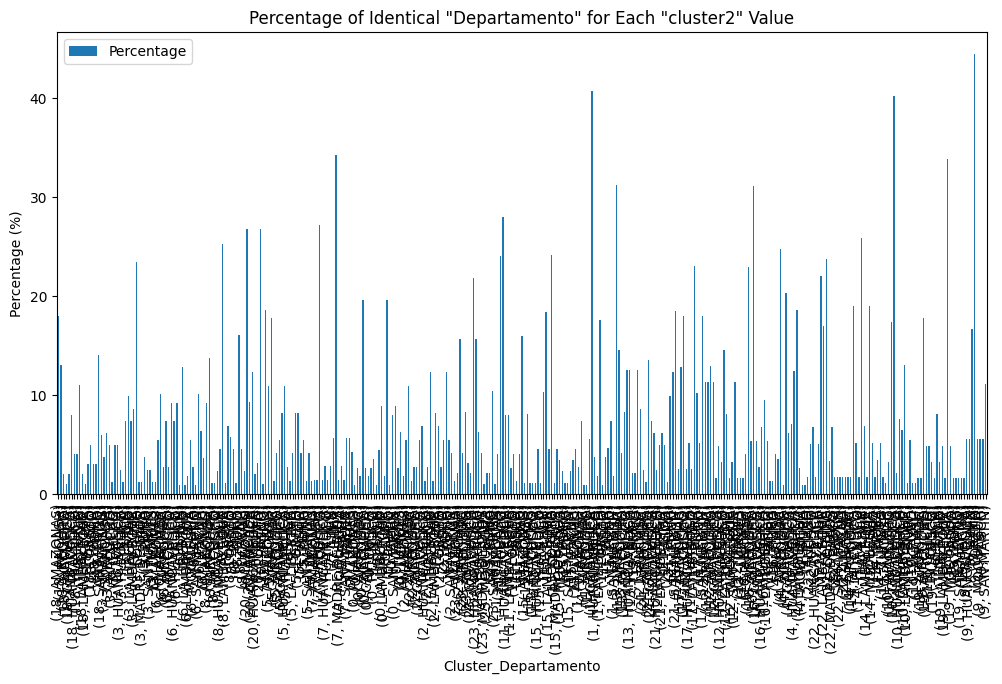

In [92]:
# Initialize an empty dictionary to store the results
results = {}

# For each unique 'cluster2' value
for cluster in df_new2['cluster2'].unique():
    # Filter the DataFrame to only include rows with that 'cluster2' value
    df_cluster = df_new2[df_new2['cluster2'] == cluster]
    
    # For each unique 'Departamento' value in the filtered DataFrame
    for departamento in df_cluster['Departamento_y'].unique():
        # Calculate the percentage of rows with that 'Departamento' value
        percentage = 100 * (df_cluster['Departamento_y'] == departamento).mean()
        
        # Store the result in the dictionary
        results[(cluster, departamento)] = percentage

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame(list(results.items()), columns=['Cluster_Departamento', 'Percentage'])

# Create a bar chart
df_results.plot(x='Cluster_Departamento', y='Percentage', kind='bar', figsize=(12, 6))
plt.ylabel('Percentage (%)')
plt.title('Percentage of Identical "Departamento" for Each "cluster2" Value')
plt.show()

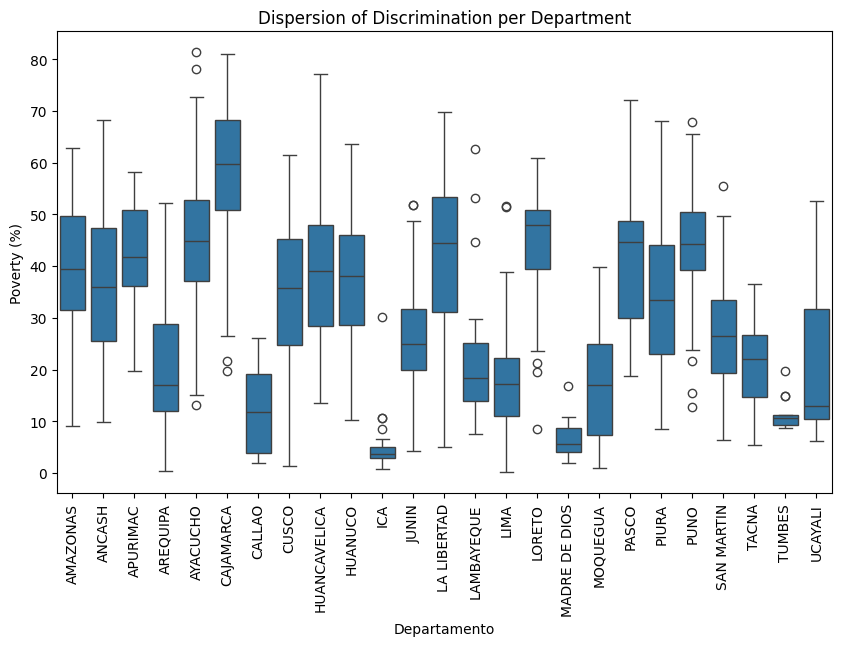

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Departamento', y='Poverty (%)', data=df_new)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Dispersion of Discrimination per Department')
plt.show()

In [95]:
df_new

,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score,EC_SQKM_Category,Teachers_EC_SCategory,Total Education Centres - 2019,Poverty (%) Normalized
0,10202,AMAZONAS,BAGUA,ARAMANGO,BAGUAARAMANGO,7552,2935,98,16,1002,119,113,6.50,30.75,24.22,7.34,473.00,6678.30,106.38,38.50,322,680,1.00,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,114,48.29
1,10201,AMAZONAS,BAGUA,BAGUA,BAGUABAGUA,2595,26241,8,53,1140,179,211,9.80,175.70,24.11,22.92,473.00,24762.90,3215.04,16.20,324,817,1.00,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0,5,Below Mean,Above Mean,61,20.83
2,10203,AMAZONAS,BAGUA,COPALLIN,BAGUACOPALLIN,2505,2467,30,12,546,48,34,6.70,18.24,3.31,3.65,473.00,4085.78,122.14,24.50,175,371,1.00,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1,6,Below Mean,Below Mean,42,31.05
3,10204,AMAZONAS,BAGUA,EL PARCO,BAGUAEL PARCO,622,671,5,4,106,8,8,7.40,8.91,3.43,2.59,473.00,949.54,11.82,35.20,31,74,1.00,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1,8,Below Mean,Below Mean,9,44.23
4,10205,AMAZONAS,BAGUA,IMAZA,BAGUAIMAZA,24475,5377,301,22,2192,414,304,7.20,68.33,13.71,16.57,473.00,7257.48,82.74,53.90,538,1654,1.00,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,323,67.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250303,UCAYALI,PADRE ABAD,CURIMANA,PADRE ABADCURIMANA,4831,4327,60,8,364,83,72,7.30,59.71,15.23,13.12,293.00,4806.80,86.68,9.00,120,244,1.00,1531.13,5.20,80.52,540.88,44.41,5.98,1.69,2.28,25.06,9158,364,0.04,52.49,0.95,-0.24,0,1,1,1,1,0,1,1,1,7,Below Mean,Below Mean,68,11.96
1870,250302,UCAYALI,PADRE ABAD,IRAZOLA,PADRE ABADIRAZOLA,4019,6922,45,16,760,90,61,6.90,47.33,12.48,10.15,293.00,7048.66,275.80,12.90,248,511,1.00,2406.51,5.20,89.31,432.62,25.35,4.55,1.38,2.48,16.23,10941,759,0.07,64.42,2.52,-0.31,0,1,1,1,1,0,1,1,1,7,Below Mean,Below Mean,61,16.76
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,PADRE ABADNESHUYA,4485,4518,52,7,317,76,68,7.80,78.29,12.15,8.42,293.00,6276.42,240.34,11.90,101,216,NaN,NaN,5.20,86.25,645.43,1127.10,NaN,1.60,2.44,16.36,9003,317,0.04,69.71,2.67,-0.31,0,1,0,1,1,0,1,1,1,6,Below Mean,Below Mean,59,15.53
1872,250301,UCAYALI,PADRE ABAD,PADRE ABAD,PADRE ABADPADRE ABAD,7756,27063,82,56,1846,256,213,8.10,224.59,34.54,39.98,293.00,25038.70,2379.76,9.40,617,1229,1.00,3834.17,5.20,94.59,483.27,35.99,9.08,1.35,3.40,20.10,34819,1846,0.05,71.91,6.83,-0.28,0,1,1,1,0,0,1,1,0,5,Below Mean,Above Mean,138,12.45


<Axes: xlabel='*Cel_Pop', ylabel='Poverty (%)'>

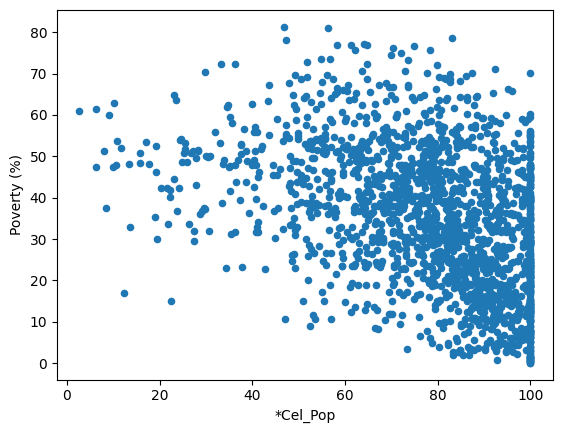

In [96]:
# Create a scatter plot with 'average_percentage' and 'poverty (%)'
df_new.plot.scatter(x='*Cel_Pop', y='Poverty (%)')

array([[<Axes: title={'center': '*Cel_Pop'}>,
        <Axes: title={'center': 'Poverty (%)'}>]], dtype=object)

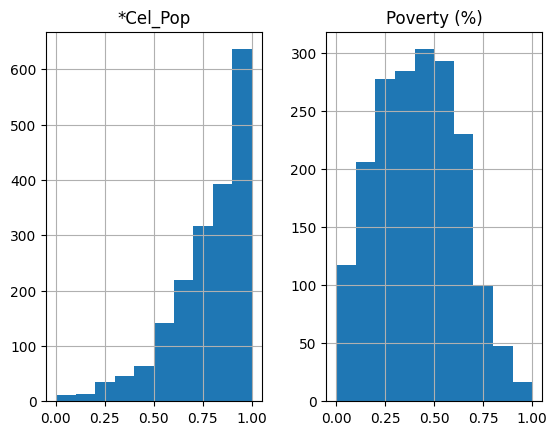

In [97]:
# Normalize the '*Cel_Pop' and 'Poverty (%)' columns to the same scale
df_new_normalized = (df_new[['*Cel_Pop', 'Poverty (%)']] - df_new[['*Cel_Pop', 'Poverty (%)']].min()) / (df_new[['*Cel_Pop', 'Poverty (%)']].max() - df_new[['*Cel_Pop', 'Poverty (%)']].min())

# Create a histogram of the normalized '*Cel_Pop' and 'Poverty (%)' columns
df_new_normalized.hist()

In [100]:
df_new

,Ubigeo,Departamento,Provincia,Distrito,Prov + Distrito,Pob. Rural ('000s),Pob. Urbana ('000s),Education Centres Rural - 2019,Education Centres Urban - 2019,Non-reading population 2017,Teachers - Elementary,Teachers - Secondary,Average Years of Study,Budget 2022 (S/ Mn),Expenses 2022 (S/ Mn),Income 2022 (S/ Mn),Distritos's suspicious money laundry operations 2022,People with cellphone 2022,People with internet 2022,Poverty (%),Men Illiteracy (#),Women Illiteracy (#),Agricultural Tipology 2,Area KM2,Discrimination %,*EC_Rural,*EC_Urban,*EC_SQKM,*Pop_Density,*Teachers_Pop,*Teachers_EC,*D_Month-Income_PerCapita - Pounds,*Pop_Total,*Illiteracy_Total,*Illiteracy_Pop,*Cel_Pop,*Int_Pop,Income_Zscore,_classPoverty (%),_class*D_Month-Income_PerCapita - Pounds,_class*EC_SQKM,_class*Illiteracy_Pop,_class*Teachers_EC,_classDiscrimination %,_classDistritos's suspicious money laundry operations 2022,_class*Cel_Pop,_class*Int_Pop,Vulnerability_Score,EC_SQKM_Category,Teachers_EC_SCategory,Total Education Centres - 2019,Poverty (%) Normalized
0,10202,AMAZONAS,BAGUA,ARAMANGO,BAGUAARAMANGO,7552,2935,98,16,1002,119,113,6.50,30.75,24.22,7.34,473.00,6678.30,106.38,38.50,322,680,1.00,671.32,5.90,77.06,183.44,169.81,15.62,2.21,2.04,12.24,10487,1002,0.10,63.68,1.01,-0.34,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,114,48.29
1,10201,AMAZONAS,BAGUA,BAGUA,BAGUABAGUA,2595,26241,8,53,1140,179,211,9.80,175.70,24.11,22.92,473.00,24762.90,3215.04,16.20,324,817,1.00,216.19,5.90,324.38,495.11,282.15,133.38,1.35,6.39,13.91,28836,1141,0.04,85.87,11.15,-0.32,0,1,0,1,0,1,1,1,0,5,Below Mean,Above Mean,61,20.83
2,10203,AMAZONAS,BAGUA,COPALLIN,BAGUACOPALLIN,2505,2467,30,12,546,48,34,6.70,18.24,3.31,3.65,473.00,4085.78,122.14,24.50,175,371,1.00,71.22,5.90,83.50,205.58,589.74,69.81,1.65,1.95,12.83,4972,546,0.11,82.18,2.46,-0.33,0,1,0,0,1,1,1,1,1,6,Below Mean,Below Mean,42,31.05
3,10204,AMAZONAS,BAGUA,EL PARCO,BAGUAEL PARCO,622,671,5,4,106,8,8,7.40,8.91,3.43,2.59,473.00,949.54,11.82,35.20,31,74,1.00,11.62,5.90,124.40,167.75,774.45,111.26,1.24,1.78,35.12,1293,105,0.08,73.44,0.91,-0.17,1,1,0,1,1,1,1,1,1,8,Below Mean,Below Mean,9,44.23
4,10205,AMAZONAS,BAGUA,IMAZA,BAGUAIMAZA,24475,5377,301,22,2192,414,304,7.20,68.33,13.71,16.57,473.00,7257.48,82.74,53.90,538,1654,1.00,3748.81,5.90,81.31,244.41,86.16,7.96,2.41,2.22,9.71,29852,2192,0.07,24.31,0.28,-0.35,1,1,1,1,1,1,1,1,1,9,Below Mean,Below Mean,323,67.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250303,UCAYALI,PADRE ABAD,CURIMANA,PADRE ABADCURIMANA,4831,4327,60,8,364,83,72,7.30,59.71,15.23,13.12,293.00,4806.80,86.68,9.00,120,244,1.00,1531.13,5.20,80.52,540.88,44.41,5.98,1.69,2.28,25.06,9158,364,0.04,52.49,0.95,-0.24,0,1,1,1,1,0,1,1,1,7,Below Mean,Below Mean,68,11.96
1870,250302,UCAYALI,PADRE ABAD,IRAZOLA,PADRE ABADIRAZOLA,4019,6922,45,16,760,90,61,6.90,47.33,12.48,10.15,293.00,7048.66,275.80,12.90,248,511,1.00,2406.51,5.20,89.31,432.62,25.35,4.55,1.38,2.48,16.23,10941,759,0.07,64.42,2.52,-0.31,0,1,1,1,1,0,1,1,1,7,Below Mean,Below Mean,61,16.76
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,PADRE ABADNESHUYA,4485,4518,52,7,317,76,68,7.80,78.29,12.15,8.42,293.00,6276.42,240.34,11.90,101,216,NaN,NaN,5.20,86.25,645.43,1127.10,NaN,1.60,2.44,16.36,9003,317,0.04,69.71,2.67,-0.31,0,1,0,1,1,0,1,1,1,6,Below Mean,Below Mean,59,15.53
1872,250301,UCAYALI,PADRE ABAD,PADRE ABAD,PADRE ABADPADRE ABAD,7756,27063,82,56,1846,256,213,8.10,224.59,34.54,39.98,293.00,25038.70,2379.76,9.40,617,1229,1.00,3834.17,5.20,94.59,483.27,35.99,9.08,1.35,3.40,20.10,34819,1846,0.05,71.91,6.83,-0.28,0,1,1,1,0,0,1,1,0,5,Below Mean,Above Mean,138,12.45


In [101]:
# Save the DataFrame as a CSV file
df_new.to_csv('Main3.csv', index=False)